In this assignment, we are required to train a machine learning (ML) model for credit card fraud detection
using the anonymized credit card transactions dataset, which is provided in a CSV file—Creditcard.csv.
Feature 'Class' is the response variable, and it takes the value ‘1’ in case of fraud and ‘0’ otherwise.
Features V1, V2, …, and V28 are the principal components obtained with PCA.
The only features that have not been transformed with PCA are 'Time' and 'Amount.'
The feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
 The feature 'Amount' is the transaction Amount.

 Learning Objectives:

* Perform visual and exploratory data analytics techniques.

* Perform activities such as model selection, training, and finalization.

* Perform model fine-tuning and explain the results along with the interpretations.


Select the assignment that you want to submit for grading. Read the overview of the selected assignment thoroughly.

As part of the assignment, you need to perform the required analysis and train a machine learning model. As part of the analysis, your code should produce the following four element

            a.  Visual and exploratory analysis

            b.  Model training, selection, and finalization

            c.  Model fine-tuning

            d.  Model results and interpretation

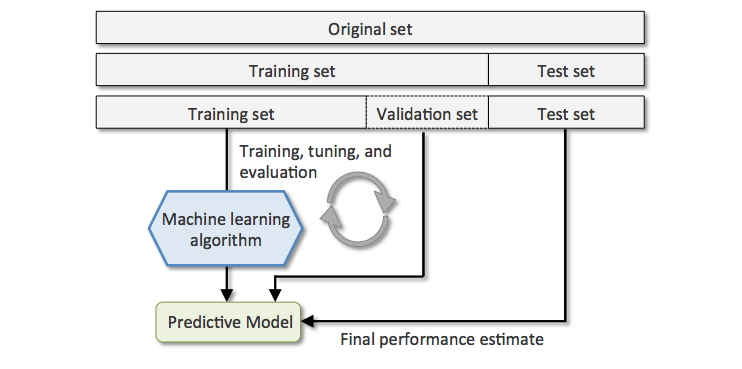

## Table of Contents
1. [Importing dependencies](#p1)
2. [Exploratory data analysis](#p2)
    * [Splitting the data into train & test data](#p2-1)
3. [Model Building](#p3)
  * [Supervised Algorithms](#p3-1)
    * [On unbalanced dataset](#p3-1-1)
    * [Undersampling](#p3-1-2)
    * [Oversampling](#p3-1-3)
    * [Oversampling with SMOTE Oversampling](#p3-1-4)
    * [Oversampling with ADASYN Oversampling](#p3-1-5)
  * [Unsupervised Algorithms](#p3-2)
    * [On unbalanced dataset](#p3-2-1)
    * [Undersampling](#p3-2-2)
    * [Oversampling](#p3-2-3)
    * [Oversampling with SMOTE Oversampling](#p3-2-4)
    * [Oversampling with ADASYN Oversampling](#p3-2-5)
4. [Hyperparameter Tuning](#p4)
5. [Conclusion](#p5)

# **Task 1** -- Perform visual and exploratory data analytics techniques.

### <a name="p1">Importing Dependencies</a>

In [ ]:
from google.colab import drive #Importing drive as the dataset is stored in google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import necessary libraries
import pandas as pd #Used for data analysis (Mainly works with tabular data)
import numpy as np #(Mainly works with numeric data)
import matplotlib.pyplot as plt #Used for data visulaization
import seaborn as sns #Used for data visualization
import warnings
warnings.filterwarnings('ignore') #To supress warnings

### **Reading and understanding the data**

In [ ]:
#data = pandas.read_csv('/content/drive/My Drive/my_directory/example.cs) #Basic syntax to load a dataset
df = pd.read_csv('/content/drive/MyDrive/credit/Creditcard.csv', index_col=False) #Loading data set
df.head() #To see first five rows of the dataset

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### <a name="p2">Exploratory data analysis</a>

df.shape returns tuple of shape (rows, columns) of a series or a dataframe

In [ ]:
df.shape

(284807, 31)

To get a summary of a dataframe we use info() function. This method prints information about a dataframe including the index dtypes, column dtypes, non-null values and memory usage.

In [ ]:
info = df.info()
print (info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Above results indicate that there are no null values in the dataset.

We can also verify the presence of null values using isnull() function.

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### **Removing duplicates if any**

To remove dupliactes from a dataframe, we can use pandas drop_duplicates() function. drop_duplicates() removes duplicate rows based on all columns.

In [ ]:
data = df.drop_duplicates()
print(df.shape)
print(data.shape)

(284807, 31)
(283726, 31)


In [ ]:
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  3.918649e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  5.682686e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -8.761736e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.811118e-15      1.415869   -5.683171     -0.848640   
V5      284807.0 -1.552103e-15      1.380247 -113.743307     -0.691597   
V6      284807.0  2.040130e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -1.698953e-15      1.237094  -43.557242     -0.554076   
V8      284807.0 -1.893285e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -3.147640e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  1.772925e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  9.289524e-16      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.803266e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  1.674888e-15      0.995274   -5.791881     -0.648539   
V14     284807.0  1.475621e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  3.501098e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.392460e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -7.466538e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  4.258754e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  9.019919e-16      0.814041   -7.213527     -0.456299   
V20     284807.0  5.126845e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.473120e-16      0.734524  -34.830382     -0.228395   
V22     284807.0  8.042109e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  5.282512e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.456271e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  1.426896e-15      0.521278  -10.295397     -0.317145   
V26     284807.0  1.701640e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.662252e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.217809e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [ ]:
fraud=df[df['Class']==1]
genuine=df[df['Class']==0]

In [ ]:
fraud.describe().T

count          mean           std         min           25%  \
Time    492.0  80746.806911  47835.365138  406.000000  41241.500000   
V1      492.0     -4.771948      6.783687  -30.552380     -6.036063   
V2      492.0      3.623778      4.291216   -8.402154      1.188226   
V3      492.0     -7.033281      7.110937  -31.103685     -8.643489   
V4      492.0      4.542029      2.873318   -1.313275      2.373050   
V5      492.0     -3.151225      5.372468  -22.105532     -4.792835   
V6      492.0     -1.397737      1.858124   -6.406267     -2.501511   
V7      492.0     -5.568731      7.206773  -43.557242     -7.965295   
V8      492.0      0.570636      6.797831  -41.044261     -0.195336   
V9      492.0     -2.581123      2.500896  -13.434066     -3.872383   
V10     492.0     -5.676883      4.897341  -24.588262     -7.756698   
V11     492.0      3.800173      2.678605   -1.702228      1.973397   
V12     492.0     -6.259393      4.654458  -18.683715     -8.688177   
V13     492.0     -0.109334      1.104518   -3.127795     -0.979117   
V14     492.0     -6.971723      4.278940  -19.214325     -9.692723   
V15     492.0     -0.092929      1.049915   -4.498945     -0.643539   
V16     492.0     -4.139946      3.865035  -14.129855     -6.562915   
V17     492.0     -6.665836      6.970618  -25.162799    -11.945057   
V18     492.0     -2.246308      2.899366   -9.498746     -4.664576   
V19     492.0      0.680659      1.539853   -3.681904     -0.299423   
V20     492.0      0.372319      1.346635   -4.128186     -0.171760   
V21     492.0      0.713588      3.869304  -22.797604      0.041787   
V22     492.0      0.014049      1.494602   -8.887017     -0.533764   
V23     492.0     -0.040308      1.579642  -19.254328     -0.342175   
V24     492.0     -0.105130      0.515577   -2.028024     -0.436809   
V25     492.0      0.041449      0.797205   -4.781606     -0.314348   
V26     492.0      0.051648      0.471679   -1.152671     -0.259416   
V27     492.0      0.170575      1.376766   -7.263482     -0.020025   
V28     492.0      0.075667      0.547291   -1.869290     -0.108868   
Amount  492.0    122.211321    256.683288    0.000000      1.000000   
Class   492.0      1.000000      0.000000    1.000000      1.000000   

                 50%            75%            max  
Time    75568.500000  128483.000000  170348.000000  
V1         -2.342497      -0.419200       2.132386  
V2          2.717869       4.971257      22.057729  
V3         -5.075257      -2.276185       2.250210  
V4          4.177147       6.348729      12.114672  
V5         -1.522962       0.214562      11.095089  
V6         -1.424616      -0.413216       6.474115  
V7         -3.034402      -0.945954       5.802537  
V8          0.621508       1.764879      20.007208  
V9         -2.208768      -0.787850       3.353525  
V10        -4.578825      -2.614184       4.031435  
V11         3.586218       5.307078      12.018913  
V12        -5.502530      -2.974088       1.375941  
V13        -0.065566       0.672964       2.815440  
V14        -6.729720      -4.282821       3.442422  
V15        -0.057227       0.609189       2.471358  
V16        -3.549795      -1.226043       3.139656  
V17        -5.302949      -1.341940       6.739384  
V18        -1.664346       0.091772       3.790316  
V19         0.646807       1.649318       5.228342  
V20         0.284693       0.822445      11.059004  
V21         0.592146       1.244611      27.202839  
V22         0.048434       0.617474       8.361985  
V23        -0.073135       0.308378       5.466230  
V24        -0.060795       0.285328       1.091435  
V25         0.088371       0.456515       2.208209  
V26         0.004321       0.396733       2.745261  
V27         0.394926       0.826029       3.052358  
V28         0.146344       0.381152       1.779364  
Amount      9.250000     105.890000    2125.870000  
Class       1.000000       1.000000       1.000000

In [ ]:
genuine.describe().T

count          mean           std         min           25%  \
Time    284315.0  94838.202258  47484.015786    0.000000  54230.000000   
V1      284315.0      0.008258      1.929814  -56.407510     -0.917544   
V2      284315.0     -0.006271      1.636146  -72.715728     -0.599473   
V3      284315.0      0.012171      1.459429  -48.325589     -0.884541   
V4      284315.0     -0.007860      1.399333   -5.683171     -0.850077   
V5      284315.0      0.005453      1.356952 -113.743307     -0.689398   
V6      284315.0      0.002419      1.329913  -26.160506     -0.766847   
V7      284315.0      0.009637      1.178812  -31.764946     -0.551442   
V8      284315.0     -0.000987      1.161283  -73.216718     -0.208633   
V9      284315.0      0.004467      1.089372   -6.290730     -0.640412   
V10     284315.0      0.009824      1.044204  -14.741096     -0.532880   
V11     284315.0     -0.006576      1.003112   -4.797473     -0.763447   
V12     284315.0      0.010832      0.945939  -15.144988     -0.402102   
V13     284315.0      0.000189      0.995067   -5.791881     -0.648067   
V14     284315.0      0.012064      0.897007  -18.392091     -0.422453   
V15     284315.0      0.000161      0.915060   -4.391307     -0.582812   
V16     284315.0      0.007164      0.844772  -10.115560     -0.465543   
V17     284315.0      0.011535      0.749457  -17.098444     -0.482644   
V18     284315.0      0.003887      0.824919   -5.366660     -0.497414   
V19     284315.0     -0.001178      0.811733   -7.213527     -0.456366   
V20     284315.0     -0.000644      0.769404  -54.497720     -0.211764   
V21     284315.0     -0.001235      0.716743  -34.830382     -0.228509   
V22     284315.0     -0.000024      0.723668  -10.933144     -0.542403   
V23     284315.0      0.000070      0.621541  -44.807735     -0.161702   
V24     284315.0      0.000182      0.605776   -2.836627     -0.354425   
V25     284315.0     -0.000072      0.520673  -10.295397     -0.317145   
V26     284315.0     -0.000089      0.482241   -2.604551     -0.327074   
V27     284315.0     -0.000295      0.399847  -22.565679     -0.070852   
V28     284315.0     -0.000131      0.329570  -15.430084     -0.052950   
Amount  284315.0     88.291022    250.105092    0.000000      5.650000   
Class   284315.0      0.000000      0.000000    0.000000      0.000000   

                 50%            75%            max  
Time    84711.000000  139333.000000  172792.000000  
V1          0.020023       1.316218       2.454930  
V2          0.064070       0.800446      18.902453  
V3          0.182158       1.028372       9.382558  
V4         -0.022405       0.737624      16.875344  
V5         -0.053457       0.612181      34.801666  
V6         -0.273123       0.399619      73.301626  
V7          0.041138       0.571019     120.589494  
V8          0.022041       0.326200      18.709255  
V9         -0.049964       0.598230      15.594995  
V10        -0.091872       0.455135      23.745136  
V11        -0.034923       0.736362      10.002190  
V12         0.141679       0.619207       7.848392  
V13        -0.013547       0.662492       7.126883  
V14         0.051947       0.494104      10.526766  
V15         0.048294       0.648842       8.877742  
V16         0.067377       0.523738      17.315112  
V17        -0.064833       0.399922       9.253526  
V18        -0.002787       0.501103       5.041069  
V19         0.003117       0.457499       5.591971  
V20        -0.062646       0.132401      39.420904  
V21        -0.029821       0.185626      22.614889  
V22         0.006736       0.528407      10.503090  
V23        -0.011147       0.147522      22.528412  
V24         0.041082       0.439869       4.584549  
V25         0.016417       0.350594       7.519589  
V26        -0.052227       0.240671       3.517346  
V27         0.001230       0.090573      31.612198  
V28         0.011199       0.077962      33.847808  
Amount     22.000000      77.050000   25691.160000  

#### **Check the correlation between the variables**

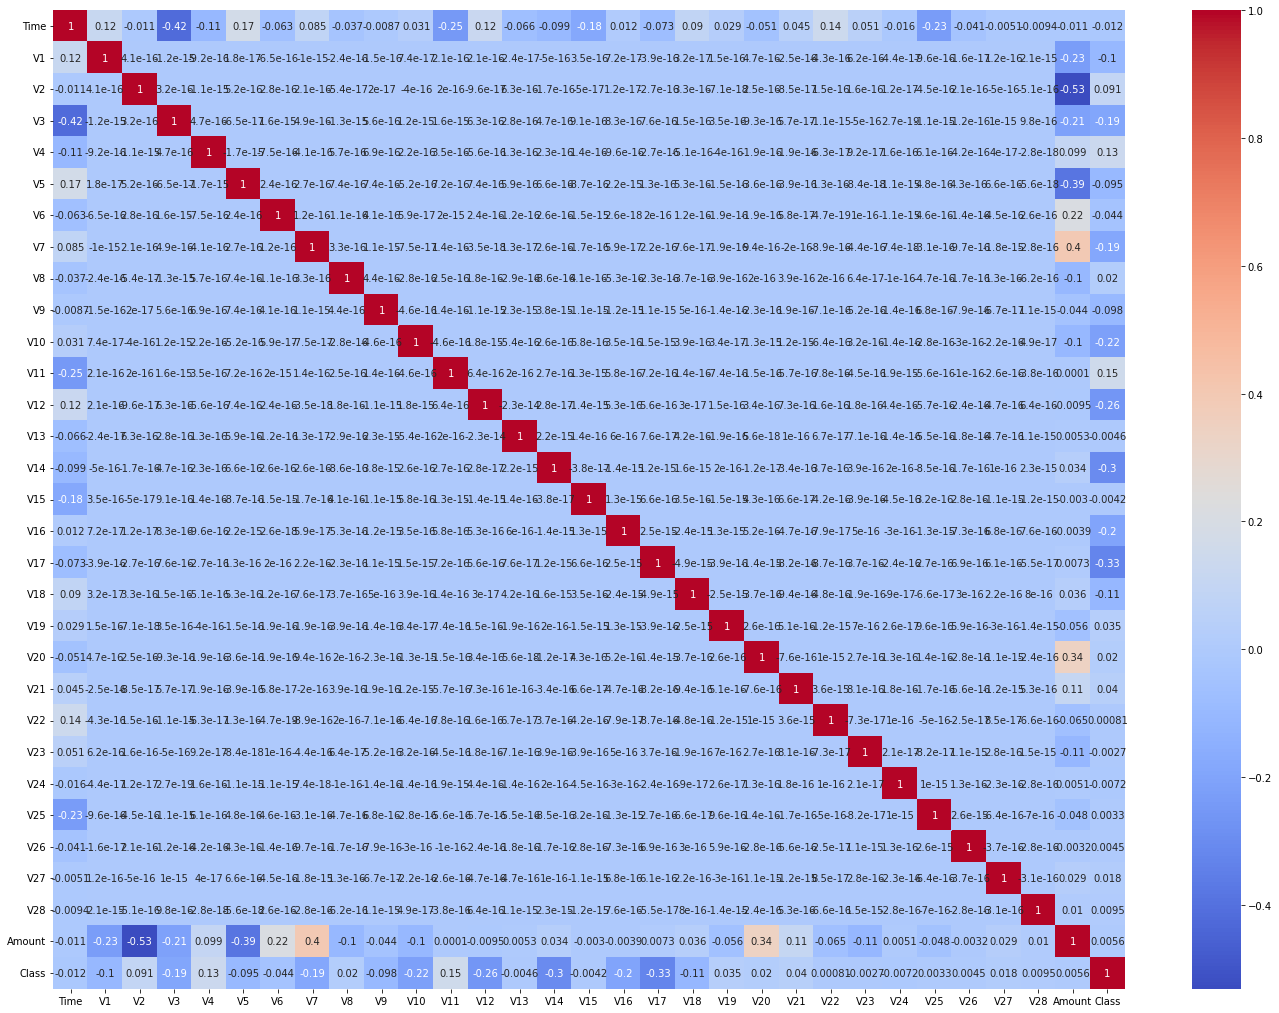

In [ ]:
# Checking the correlation
corr = df.corr()

# Checking the correlation in heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

‘Class’ is less correlated with ‘Amount’ and ‘Time’ which suggests it is hard to predict whether transaction is fraudulent or not from ‘Amount’ and ‘Time’ details of transaction.

‘Class’ is negatively correlated with ‘V3’, ‘V7’, ‘V10’, ‘V12’, ‘V14’, ‘V16’, ‘V17’ and positively correlated with ‘V2’, ‘V4’, ‘V11’. The other correlations are relatively small.
The correlation between many variables is almost negligible. The correlation between amount and V2 is negative (-0.53).

There are no significant correlations between the reduced features. Therefore we don’t drop any of the columns as they are fairly unrelated to each other.

#### **Checking the distribution of the classes**

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
genuine.Amount.describe()

The number of fraud transactions are 492 (out of 284801 transactions).

The number of non-fraudulent transactions or genuine transactions are 284315 out of 284801. From this it is clear that genuine transactions have many datapoints than fraud transactions. This dataset is highly imbalanced. It can be balanced using various techniques like undersampling, oversampling, SMOTE, ADASYN. Data needs to be visualized to find patterns.

Before visulaizing the data, split the dataset into train and test sets.

#### <a name="p2-1">Splitting the data into train & test data</a>

In [ ]:
from sklearn.model_selection import train_test_split #Importing the train test split library
X = data.drop(['Class'], axis=1) # Putting feature variables into X
y = data['Class'] # Putting target variable to y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y) # Splitting data into train and test set 75:25

In [ ]:
print("Length of X train is",len(X_train))
print("Length of y train is",len(y_train))

Length of X train is 212794
Length of y train is 212794


#### **Feature Scaling**
We need to scale only the 'Amount' column as all the other columns are already scaled (using Principal Component Analysis).

In [ ]:
from sklearn.preprocessing import StandardScaler #Importing StandardScaler
scaler = StandardScaler() # Instantiate the Scaler
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']]) # Fit the data into scaler and transform
X_train.head() #First 5 rows of the train set

Time        V1        V2        V3        V4        V5        V6  \
29031    35285.0  1.028040  0.000605  1.827002  3.129091 -1.113836  0.413892   
228014  145319.0  1.995130  0.112358 -1.608313  0.338091  0.452884 -0.559138   
208025  136942.0 -1.149643  1.304833  0.928057 -0.431527  0.297815 -0.551020   
213808  139400.0 -0.475978  1.295079 -0.771354 -1.135001  1.193496 -1.773013   
156263  107693.0 -1.247290  0.178527  1.916522 -0.432584  1.196505  1.612433   

              V7        V8        V9  ...       V20       V21       V22  \
29031  -0.665573  0.264259  0.714350  ... -0.181718 -0.279263 -0.426700   
228014  0.115485 -0.104591  0.146493  ... -0.109246 -0.284774 -0.740514   
208025  0.849476  0.246270 -0.941554  ... -0.070979 -0.107010 -0.376968   
213808  2.006649 -0.774641 -0.002023  ...  0.299516  0.139083  0.979610   
156263  0.062291  0.300123  1.580567  ... -0.173014 -0.236266 -0.123861   

             V23       V24       V25       V26       V27       V28    Amount  
29031   0.064734  0.716834  0.358839 -0.080531  0.057394  0.038398 -0.281936  
228014  0.343097  0.623906 -0.313782  0.145760 -0.061507 -0.036911 -0.318253  
208025 -0.299559  0.097597  0.694817 -0.373437 -0.216605 -0.023688 -0.278413  
213808 -0.256990  0.119326 -0.194859  0.063975  0.444008  0.209819 -0.257481  
156263  0.109693 -1.765920  0.161812 -0.623279 -0.301285 -0.116148 -0.349995  

[5 rows x 30 columns]

In [ ]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head() #First 5 rows of the test set.

Time        V1        V2        V3        V4        V5        V6  \
172311  121048.0 -1.455970  1.532517 -0.716984 -2.904799  0.826103 -0.205936   
40460    40253.0  0.913648 -0.882908  1.076775  0.231476 -1.294862  0.284413   
169857  119895.0  0.235072  0.779150 -0.756803 -0.624220  1.431704 -1.086844   
6317      7480.0 -0.447154  1.024529  1.790810  1.062934  0.190831 -0.146947   
195514  131091.0  2.089626 -1.061068 -0.560045 -0.630777 -1.116524 -0.283908   

              V7        V8        V9  ...       V20       V21       V22  \
172311  0.501610  0.873142 -0.446458  ... -0.054296 -0.229914 -0.802455   
40460  -0.797065  0.385925  1.148634  ...  0.002899 -0.097187 -0.326317   
169857  1.393776 -0.402118 -0.592141  ... -0.103628  0.170201  0.587451   
6317    0.769469 -0.075237  0.870890  ... -0.104122 -0.132662  0.049844   
195514 -1.100669  0.058750  0.447825  ... -0.630975 -0.169108  0.020586   

             V23       V24       V25       V26       V27       V28    Amount  
172311 -0.111572 -0.324477  0.160008  0.392548  0.085328  0.085885 -0.342504  
40460   0.051135  0.261482 -0.083324  0.936672 -0.049904  0.017146  0.086660  
169857 -0.256005  0.758169  0.220940  0.608724 -0.076016 -0.022656 -0.355622  
6317   -0.115379  0.352543  0.158516 -0.414700  0.061247  0.055433 -0.236226  
195514  0.275175  0.625590 -0.365148  0.068304  0.020424 -0.030520 -0.255538  

[5 rows x 30 columns]

#### **Data Visulaization**


Data visualization provides a good, organized pictorial representation of the data which makes it easier to understand, observe, analyze. It is  useful for data cleaning, exploring data structure, detecting outliers and unusual groups, identifying trends and clusters, spotting local patterns, evaluating modeling output, and presenting results.

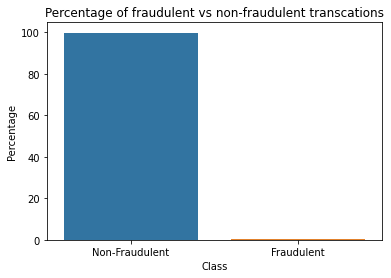

In [ ]:
classes = df["Class"].value_counts()
normal_share = round((classes[0]/df['Class'].count()*100),2)
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

From the above plot, it can be inferred visually that non-fradulent transactions are more than fraudulent transactions. It means the dataset is imbalanced with majority class non-fraudulent transactions and minority class fraudulent traansactions.

#### **Observe the distribution of classes with amount**

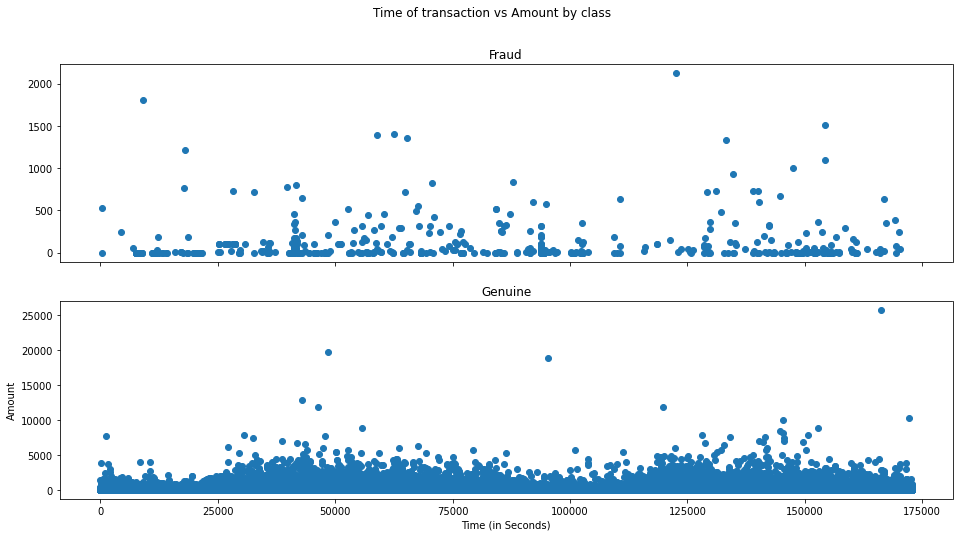

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

From the above graph, it can be inferred that fradulent transactions are mostly happening at the lower range of amount, where as non-fradulent transactions are spread throughout the range of the amount. The 'Amount' column helped to find some pattern in the data.

#### **Observe the distribution of classes with time**

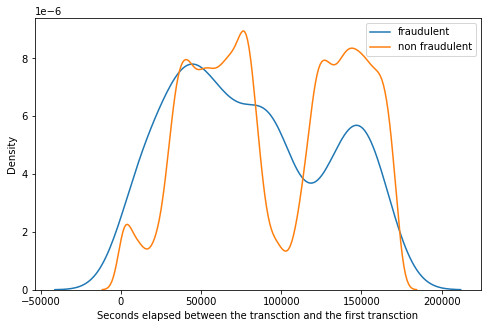

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(genuine['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transactions')
plt.legend()
plt.show()

The same graph with distplot (To plot and understand more clearly).

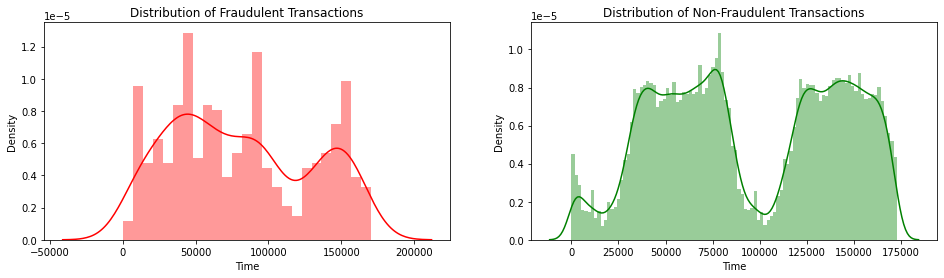

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'],bins=25,color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraudulent Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100,color='green', ax=axs[1])
axs[1].set_title("Distribution of Non-Fraudulent Transactions")

plt.show()

A specific pattern cannot be seen from the above graph. It means that the 'Time' column is not giving any much information regarding fradulent and non-fraudulent transactions. Hence, 'Time' column can be dropped.

In [ ]:
# Dropping the Time column
data.drop('Time', axis=1, inplace=True)

### **Checking the skewness**

Skewness checks the lack of symmetry in a dataset.
Skewed data often occur due to lower or upper bounds on the data. That is, data that have a lower bound are often skewed right while data that have an upper bound are often skewed left.

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

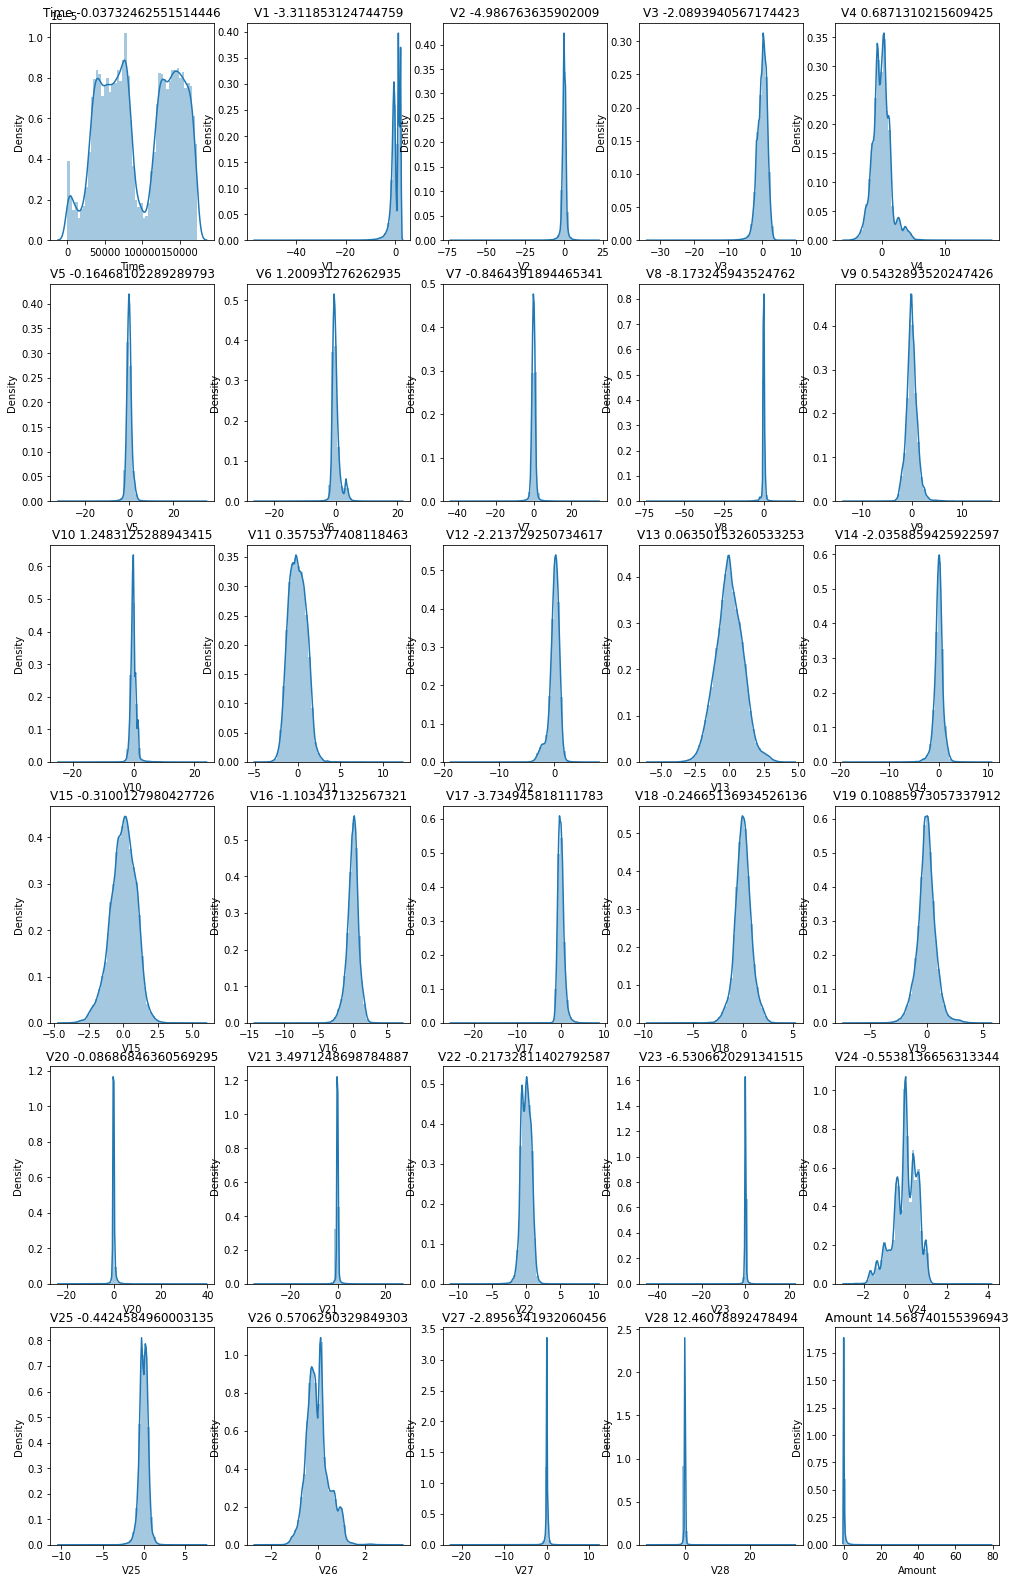

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
cols = X_train.columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We see that there are many variables, which are heavily skewed (value greater than 1 or less than -1). We will mitigate the skewness and bring them into normal distribution.

In [ ]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [ ]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

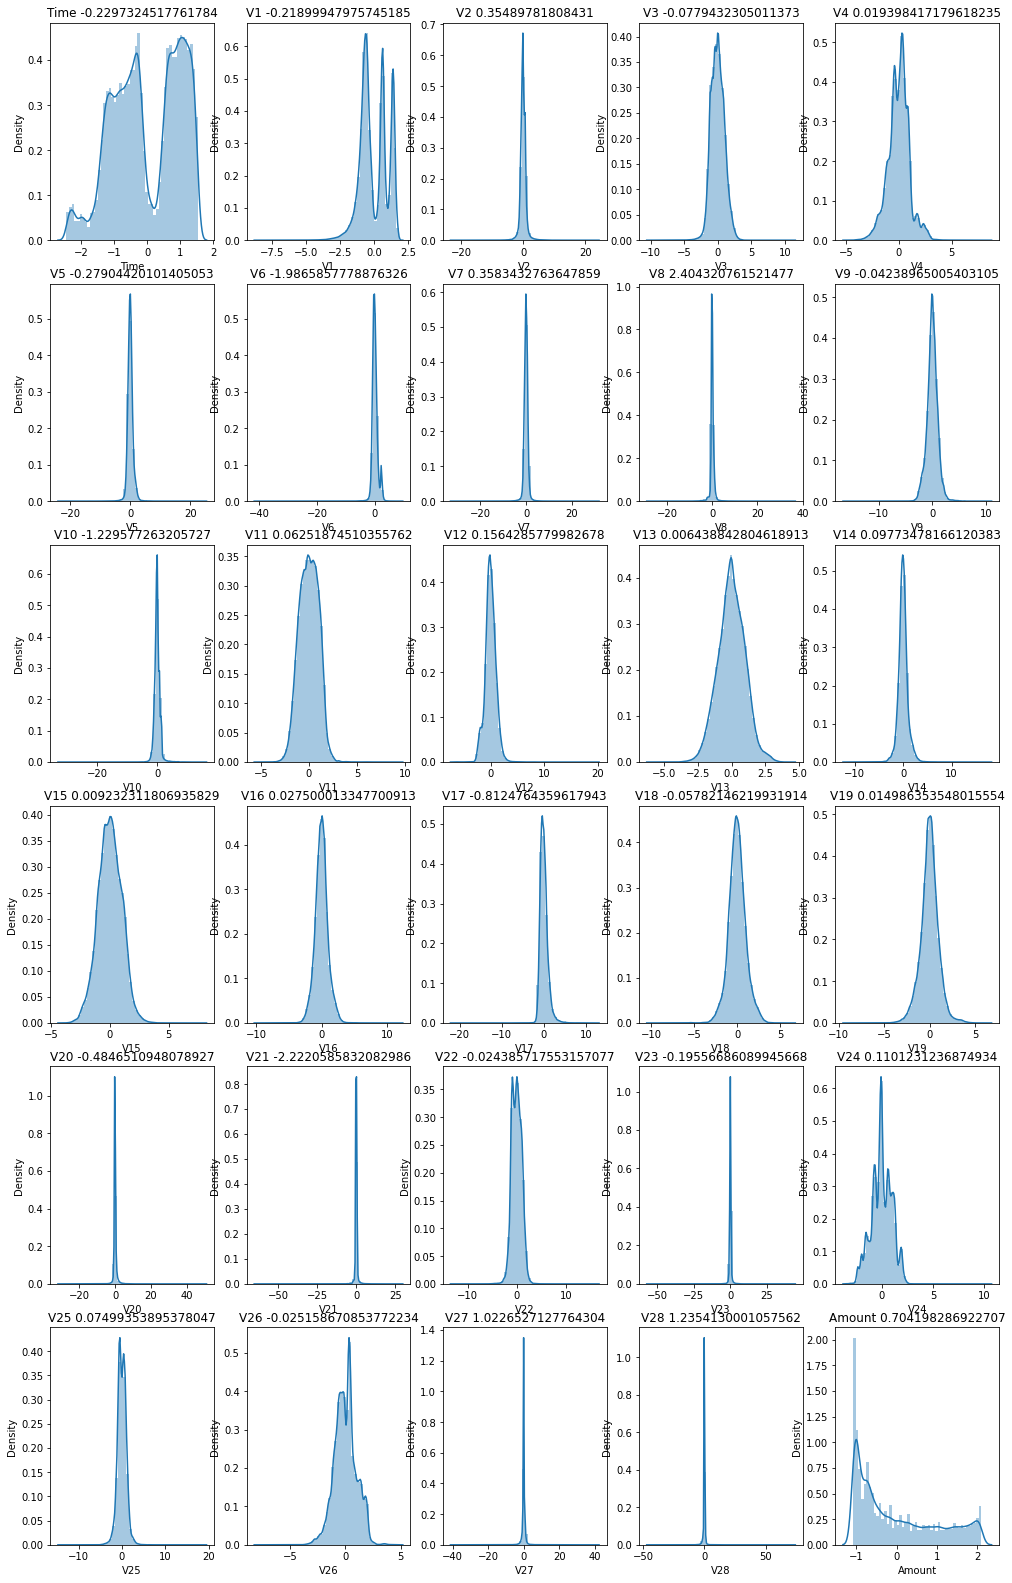

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation. Normalization converts all data points to decimals between 0 and 1.

# **Task 2** -- Model training, selection and finalization

### <a name="p3">Model Selection and training</a>

In [ ]:
# Import metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix # Prints the correct and also incorrect values in number count .
from sklearn.metrics import f1_score #Combines precision, recall into a single metric by taking the harmonic mean
from sklearn.metrics import classification_report #Used to show the precision, recall, F1 Score, and support of our trained classification model.
from sklearn.metrics import roc_curve, auc, roc_auc_score #Shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).

**ROC curve**  : ROC curve (Receiver Operating Characteristics Curve) is a metric used to measure the performance of a classifier model. The ROC curve depicts the rate of true positives (The model correctly predicts the positive class) with respect to the rate of false positives (the model predicts as positive class but in actual case it is a negative class), highlighting the sensitivity (Sensitivity is a measure of how well a machine learning model can detect positive instances. It is also known as the true positive rate (TPR) or recall of the classifier model.

In [ ]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0]) # X axis limit is from 0 to 1
    plt.ylim([0.0, 1.05]) # Y axis limit is from 0 to 1.05
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]') #The actual one is negative but predicted as positive
    plt.ylabel('True Positive Rate') #Both actual and predicted value came out negative
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

**Confusion matrix**   : A Confusion matrix is an n x n matrix used for evaluating the performance of a classification model. Here n is the number of target variables or target classes. The matrix compares the actual target values with those predicted by the machine learning model.

In [ ]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TP','FN'], ['FP', 'TN']]

  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

**Precision Recall curve** : Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

In [ ]:
from sklearn.metrics import precision_recall_curve
def precision_recall_plot(y_true, y_probs, label):

    p, r, thresh = precision_recall_curve(y_true, y_probs)
    p, r, thresh = list(p), list(r), list(thresh)
    p.pop()
    r.pop()

    fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    sns.lineplot(thresh, p, estimator=None,
                     label='Precision', ax=axis)
    axis.set_xlabel('Threshold')
    axis.set_ylabel('Precision')
    axis.legend(loc='lower left')
    axis_twin = axis.twinx()
    sns.lineplot(thresh, r, estimator=None,color='limegreen', label='Recall', ax=axis_twin)
    axis_twin.set_ylabel('Recall')
    axis_twin.set_ylim(0, 1)
    axis_twin.legend(bbox_to_anchor=(0.24, 0.18))
    axis.set_xlim(0, 1)
    axis.set_ylim(0, 1)
    axis.set_title('Precision Vs Recall')

    plt.close()

    fig.subplots_adjust(wspace=5)
    fig.tight_layout()
    display(fig)

In [ ]:
def metric_All(clf_name,y,y_pred):
  accuracy_metric = metrics.accuracy_score(y, y_pred) #To check accuracy
  f1score_metric = f1_score(y, y_pred) #To see F1score
  confusion = metrics.confusion_matrix(y, y_pred)
  TP = confusion[0,0] # true positive
  TN = confusion[1,1] # true negatives
  FP = confusion[1,0] # false positives
  FN = confusion[0,1] # false negatives
  sensitivity = TP / float(TP+FN) #Measure of how well a machine learning model can detect positive instances.
  specificity =  TN / float(TN+FP) # Metric that evaluates a model's ability to predict true negatives of each available category.
  print("Classification report")
  print(classification_report(y, y_pred))
  print("ROC curve")
  draw_roc(y, y_pred)
  roc_metric = metrics.roc_auc_score(y, y_pred)
  fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
  threshold = thresholds[np.argmax(tpr-fpr)]
  Plot_confusion_matrix(y, y_pred)
  precision_recall_plot(y, y_pred,clf_name)
  return (accuracy_metric,f1score_metric,sensitivity,specificity,roc_metric, threshold)


As we have seen that the data is heavily imbalanced, where only 492 transctions are fraudulent, we should not consider 'Accuracy' as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, measuring the ROC-AUC score for fair evaluation of the model is much recommended. It is used to understand the strength of the model by evaluating the performance of the model (at all the threshold values). F1 score of the classifier can be calculated (which give optimum results).

#### <a name="p3-1">Supervised Algorithms</a>

**Naive Bayes**

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.

**Logistic regression**

A logistic regression model predicts a dependent data variable (target variable) by analyzing the relationship between one or more existing independent variables (feature variables) by estimating probability using its underlying logistic function (sigmoid).

**Decision Tree**

A decision tree diagram is a type of flowchart that untangles the decision-making process by breaking down the different paths of action available (based on information gain, entropy).

**Random forest**

Random forest is an ensemble learning method for classification, regression.
It is built up of a number of decision trees. If the data is split into different packages and then make a decision tree in each of the different groups of data, the random forest brings all those trees together. It tries to give more preferences to hyperparameters to optimize the model.

**XGBoost**

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.

**MLP Classifier**

MLPClassifier stands for Multi-layer Perceptron classifier, is a neural network.MLPClassifier relies on an underlying Neural Network to perform the task of classification.

In [ ]:
df_Results = pd.DataFrame(columns=['Methodology','Model','Accuracy','F1 score','Sensitivity','Specificity','ROC value','Threshold'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XG Boost":XGBClassifier(),
    "MLP Classifier": MLPClassifier()
}

In [ ]:
def model(clf, df_Results, Methodology, X_train,y_train, X_test, y_test):
  for i, (clf_name,clf) in enumerate(classifiers.items()):
    clf.fit(X_train, y_train)
    print(clf_name)

    y_test_pred = clf.predict(X_test)   # Predictions on the test set
    s = metric_All(clf_name,y_test,y_test_pred)
    df_Results = df_Results.append(pd.DataFrame({'Model': clf_name+ ' on test data','Methodology':Methodology,'Accuracy': s[0] ,'F1 score':s[1],'Sensitivity':s[2],'Specificity':s[3],'ROC value': s[4],'Threshold':s[5]}, index=[0]),ignore_index= True)
    print('-'*60 )
  return df_Results


The above function is used to train, predict and get the metrics for:
1. Balanced data obtanined by
  
  * Undersampling
  * Oversampling
  * Oversampling with SMOTE
  * Oversampling with ADASYN

2. Unbalanced data

##### <a name="p3-1-1">On unbalanced dataset</a>

Naive Bayes
Classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70814
           1       0.06      0.82      0.11       118

    accuracy                           0.98     70932
   macro avg       0.53      0.90      0.55     70932
weighted avg       1.00      0.98      0.99     70932

ROC curve


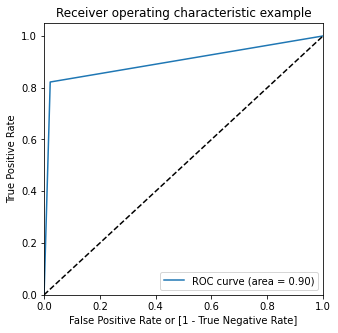

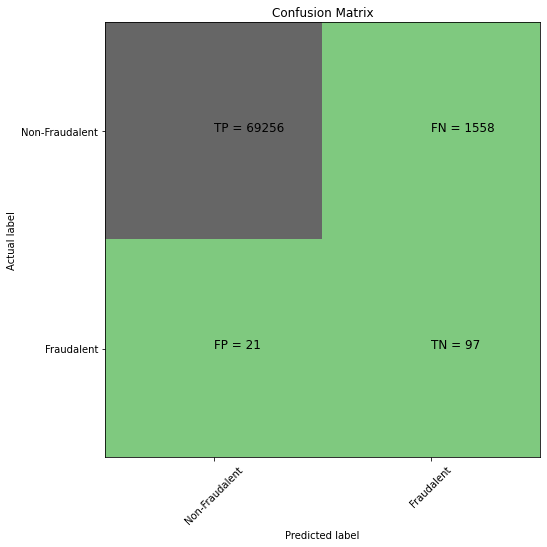

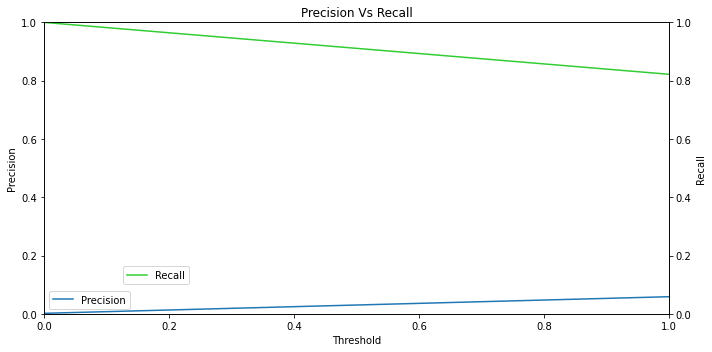

------------------------------------------------------------
Logistic Regression
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.84      0.61      0.71       118

    accuracy                           1.00     70932
   macro avg       0.92      0.80      0.85     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


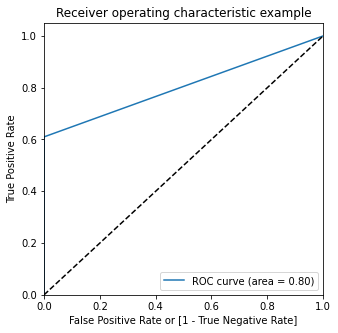

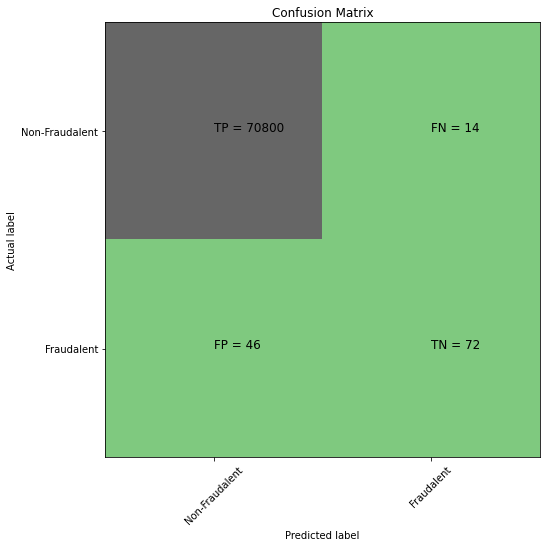

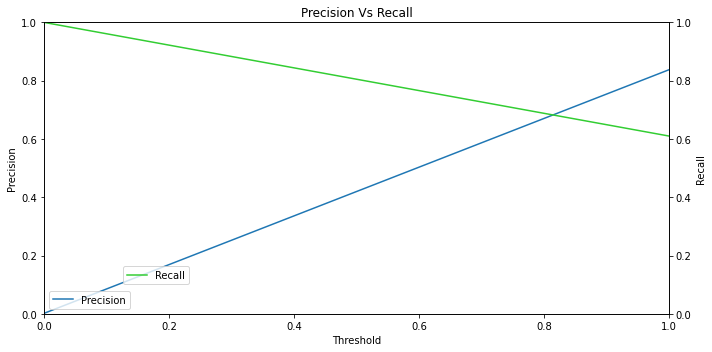

------------------------------------------------------------
Decision Tree
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.78      0.70      0.74       118

    accuracy                           1.00     70932
   macro avg       0.89      0.85      0.87     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


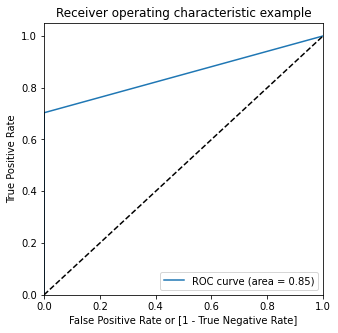

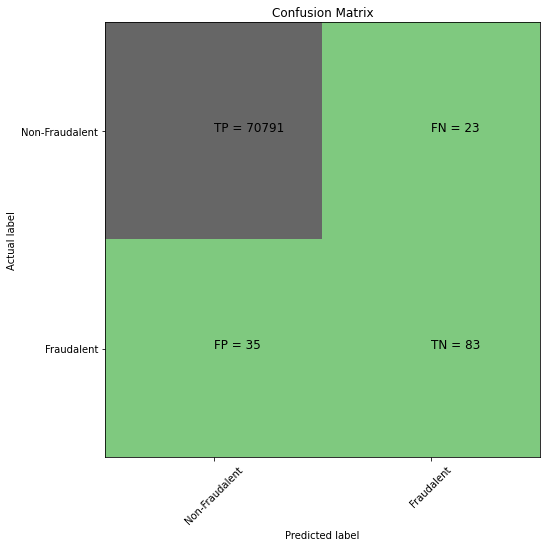

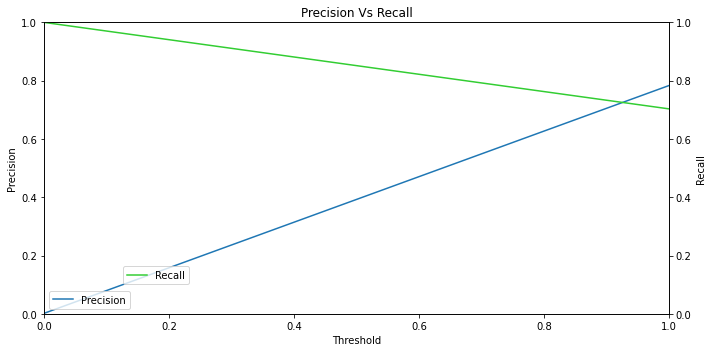

------------------------------------------------------------
Random Forest
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.95      0.76      0.85       118

    accuracy                           1.00     70932
   macro avg       0.97      0.88      0.92     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


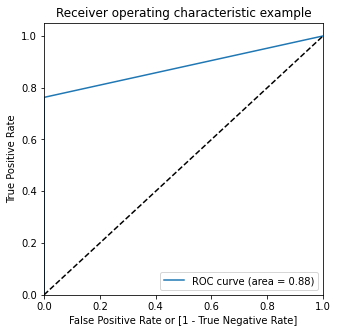

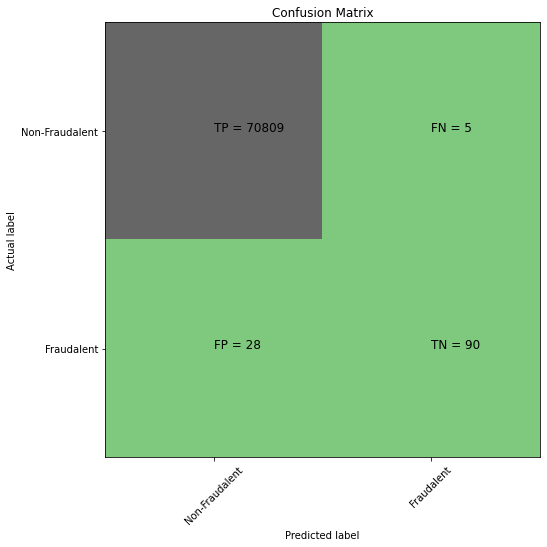

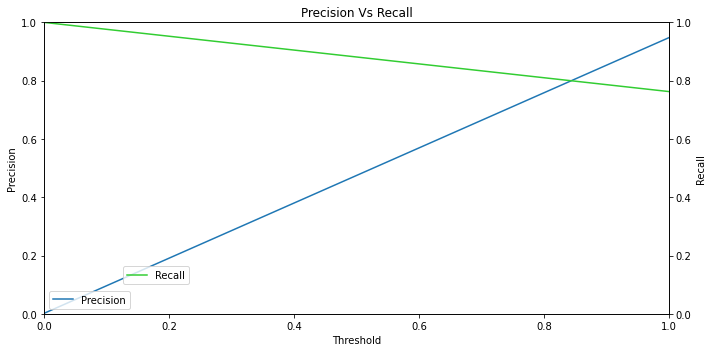

------------------------------------------------------------
XG Boost
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.90      0.74      0.81       118

    accuracy                           1.00     70932
   macro avg       0.95      0.87      0.90     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


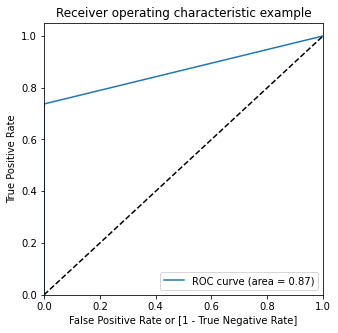

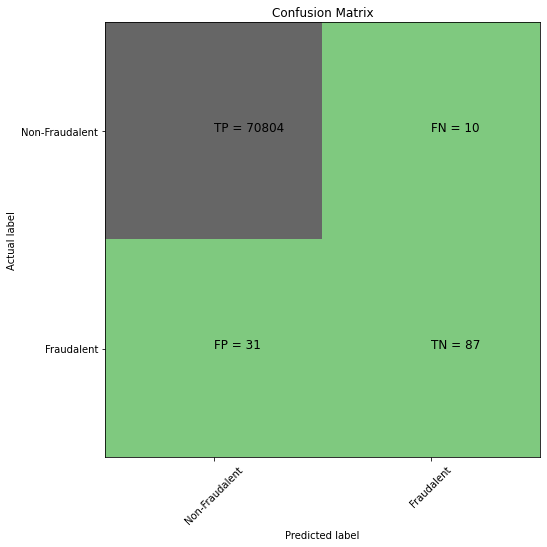

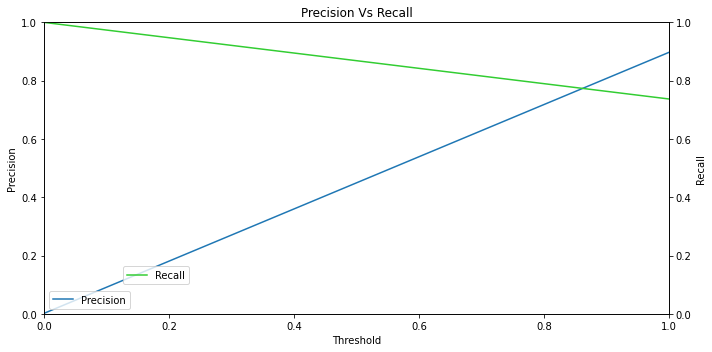

------------------------------------------------------------
MLP Classifier
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.91      0.76      0.83       118

    accuracy                           1.00     70932
   macro avg       0.95      0.88      0.91     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


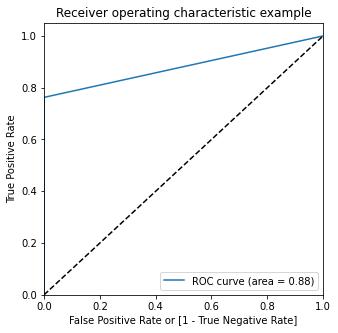

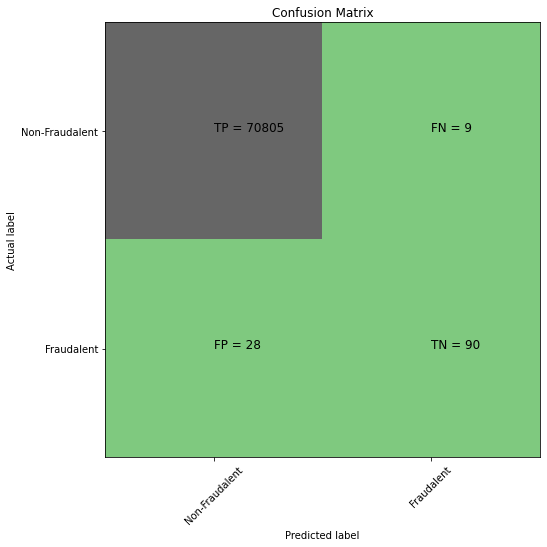

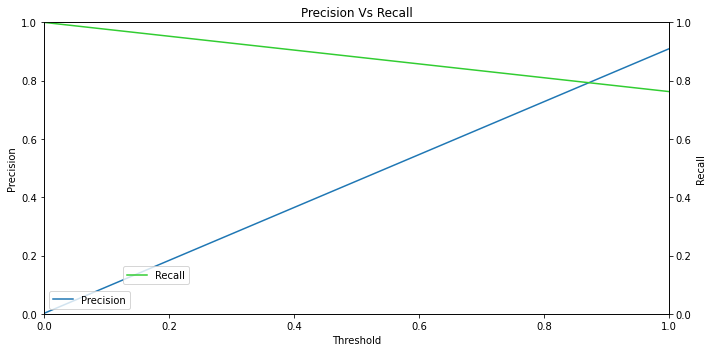

------------------------------------------------------------


In [ ]:
df_Results = model(classifiers,df_Results,"Before tuning unbalanced Supervised", X_train,y_train, X_test, y_test)

#### **Handling imbalanced dataset**

Most machine learning algorithms assume that data is equally distributed. So when we have a class imbalance, the machine learning classifier tends to be more biased towards the majority class (class which appears more frequently(in this case non-fradulent transactions)), causing bad classification of the minority class(class that doesn't appear as frequently as the other one like fradulent transactions in this dataset). In other words, the accuracy might be high but the predictions might be wrong when given a minority class as the test point. So it is always a safe, better choice to balance the dataset to get higher accuracy models on which we can rely on.

As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

* **Undersampling** :- Here for balancing the class distribution, the non-fraudulent transctions count will be reduced (similar count of fraudulent transctions)
* **Oversampling** :- Here we will make the same count of non-fraudulent transctions as fraudulent transctions.
* **SMOTE** :- SMOTE stands for Synthetic Minority Oversampling Technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data.
* **ADASYN**:- ADASYN stands for Adaptive Synthetic and is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

##### <a name="p3-1-2">Undersampling</a>

Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class (fraudulent transactions) and decreasing the size of the majority class (non-fradulent transactions). As there is a decrease in the number of points in the dataset, it is always a good way to check the hyperparameters and then select the model.

In [ ]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# instantiating the random undersampler
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Before sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_rus))

X_test_rus, y_test_rus = rus.fit_resample(X_test, y_test)
# Before sampling class distribution
print('Before sampling class distribution:-',Counter(y_test))
# new class distribution
print('New class distribution:-',Counter(y_test_rus))

Before sampling class distribution:- Counter({0: 212439, 1: 355})
New class distribution:- Counter({0: 355, 1: 355})
Before sampling class distribution:- Counter({0: 70814, 1: 118})
New class distribution:- Counter({0: 118, 1: 118})


Naive Bayes
Classification report
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       118
           1       0.95      0.82      0.88       118

    accuracy                           0.89       236
   macro avg       0.90      0.89      0.89       236
weighted avg       0.90      0.89      0.89       236

ROC curve


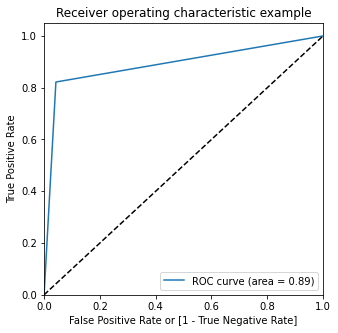

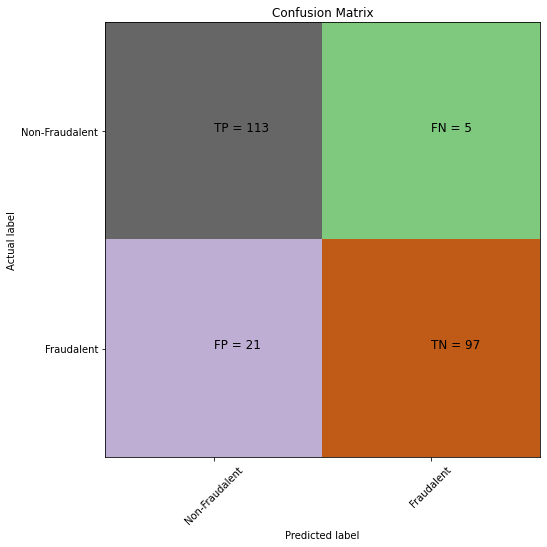

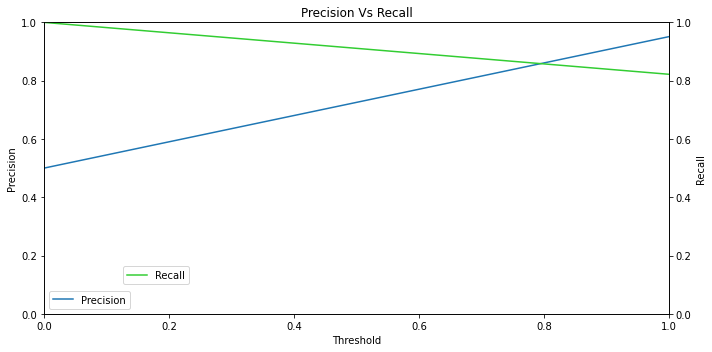

------------------------------------------------------------
Logistic Regression
Classification report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       118
           1       0.95      0.90      0.93       118

    accuracy                           0.93       236
   macro avg       0.93      0.93      0.93       236
weighted avg       0.93      0.93      0.93       236

ROC curve


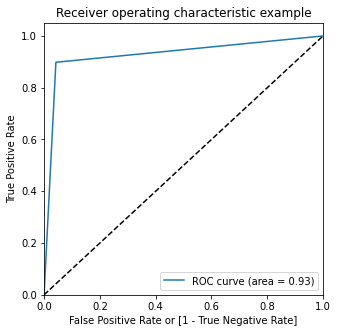

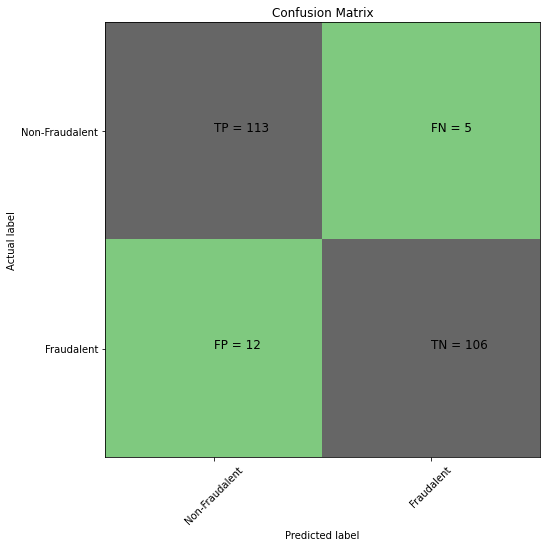

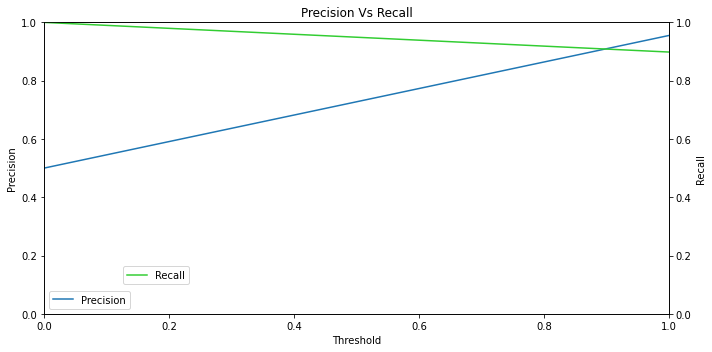

------------------------------------------------------------
Decision Tree
Classification report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       118
           1       0.94      0.87      0.90       118

    accuracy                           0.91       236
   macro avg       0.91      0.91      0.91       236
weighted avg       0.91      0.91      0.91       236

ROC curve


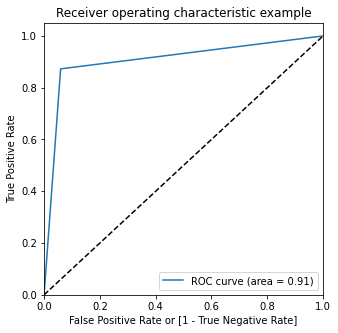

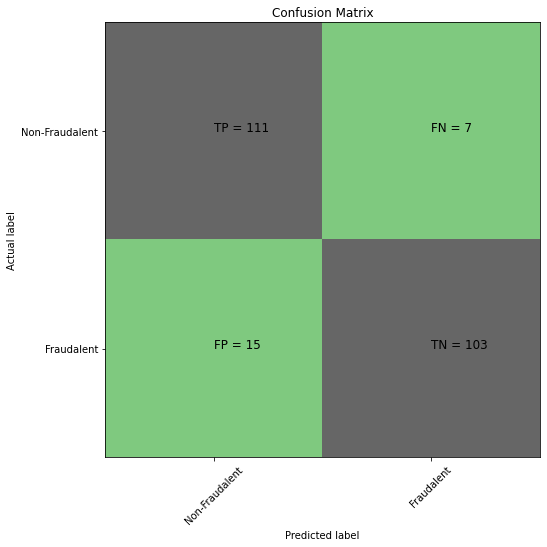

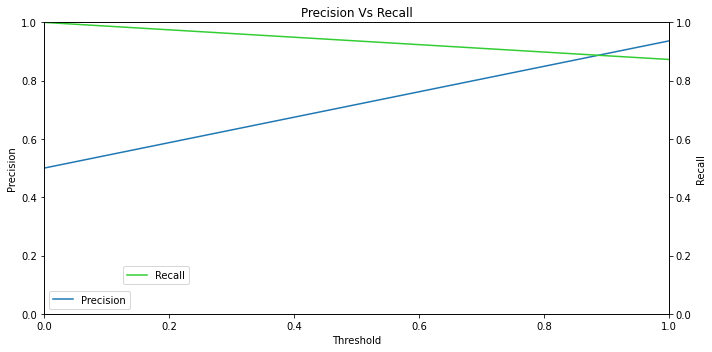

------------------------------------------------------------
Random Forest
Classification report
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       118
           1       0.98      0.88      0.93       118

    accuracy                           0.93       236
   macro avg       0.94      0.93      0.93       236
weighted avg       0.94      0.93      0.93       236

ROC curve


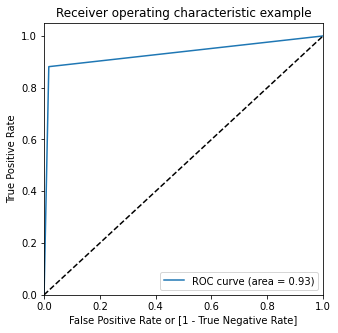

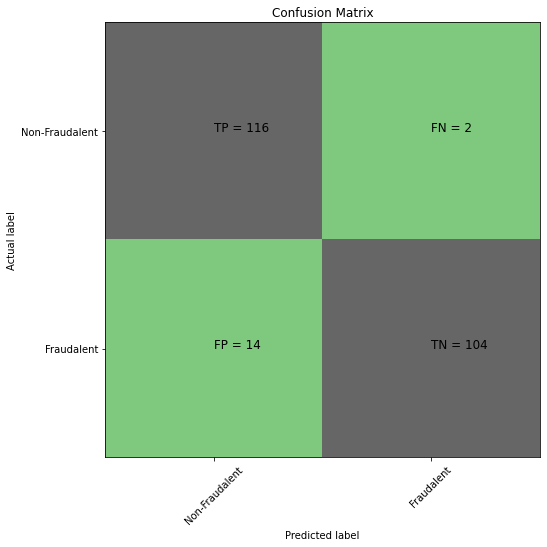

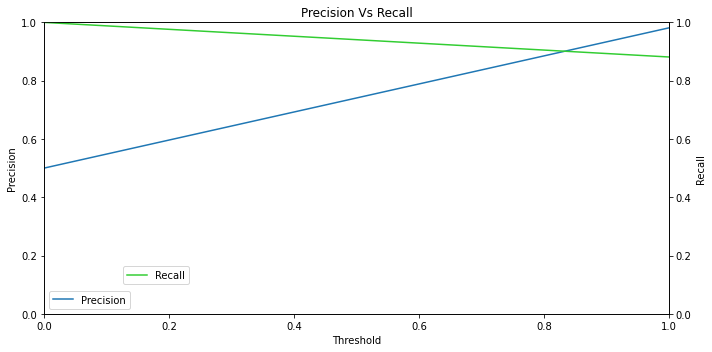

------------------------------------------------------------
XG Boost
Classification report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       118
           1       0.96      0.89      0.93       118

    accuracy                           0.93       236
   macro avg       0.93      0.93      0.93       236
weighted avg       0.93      0.93      0.93       236

ROC curve


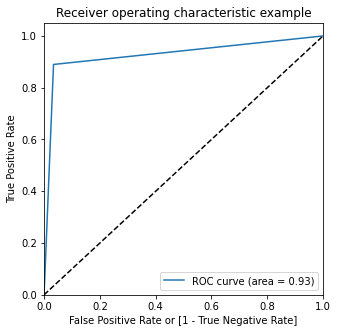

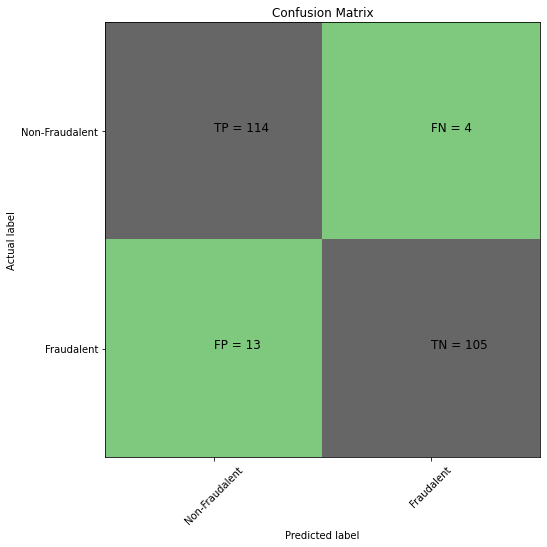

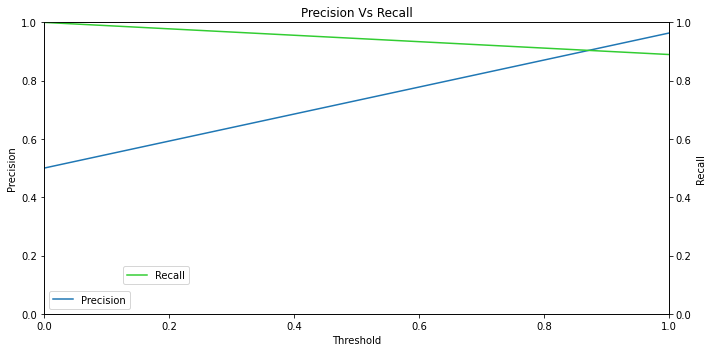

------------------------------------------------------------
MLP Classifier
Classification report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       118
           1       0.95      0.90      0.93       118

    accuracy                           0.93       236
   macro avg       0.93      0.93      0.93       236
weighted avg       0.93      0.93      0.93       236

ROC curve


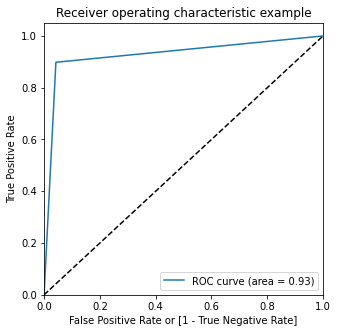

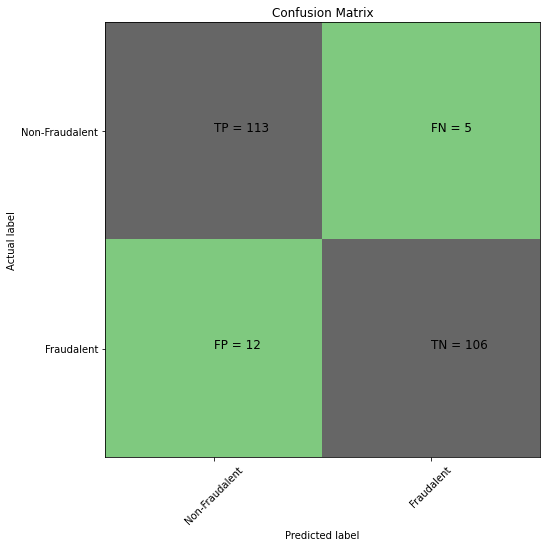

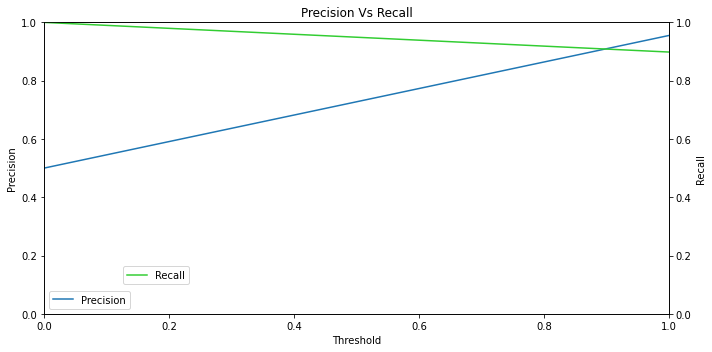

------------------------------------------------------------


In [ ]:
df_Results = model(classifiers,df_Results,"Before tuning balanced Undersampling Supervised", X_train_rus,y_train_rus, X_test_rus, y_test_rus)

##### <a name="p3-1-3">Oversampling</a>

Oversampling involves selecting examples from the minority class, with replacement, and adding them to the training dataset. This increases the number of data points of a minority class. The advantage of oversampling is that no information from the original training set is lost since we keep all members from the minority and majority classes.

In [ ]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

# instantiating the random oversampler
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Before sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 212439, 1: 355})
New class distribution:- Counter({0: 212439, 1: 212439})


Naive Bayes
Classification report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     70814
           1       0.05      0.82      0.09       118

    accuracy                           0.97     70932
   macro avg       0.52      0.90      0.54     70932
weighted avg       1.00      0.97      0.98     70932

ROC curve


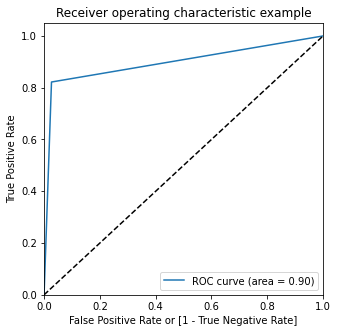

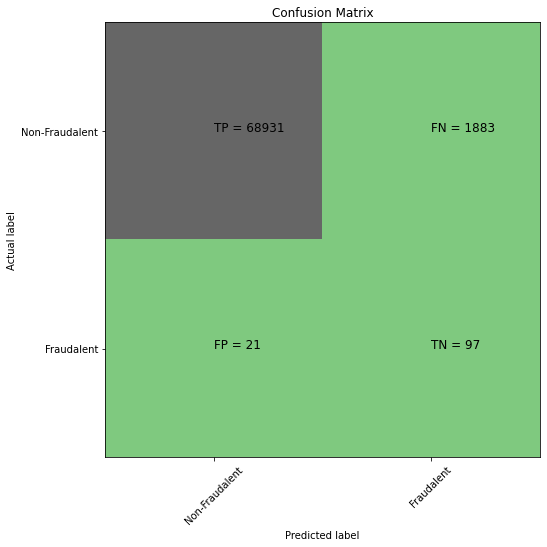

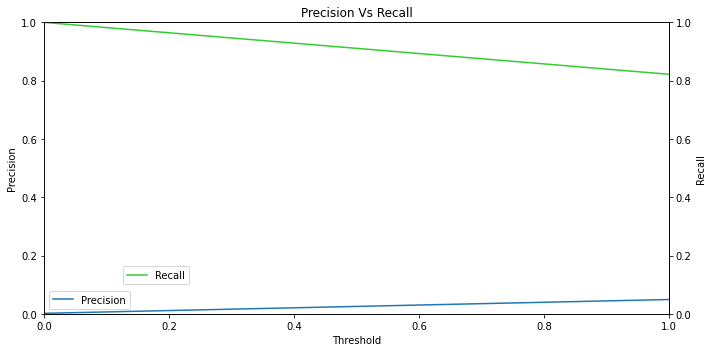

------------------------------------------------------------
Logistic Regression
Classification report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     70814
           1       0.05      0.89      0.10       118

    accuracy                           0.97     70932
   macro avg       0.53      0.93      0.54     70932
weighted avg       1.00      0.97      0.98     70932

ROC curve


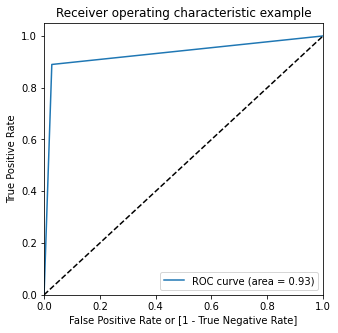

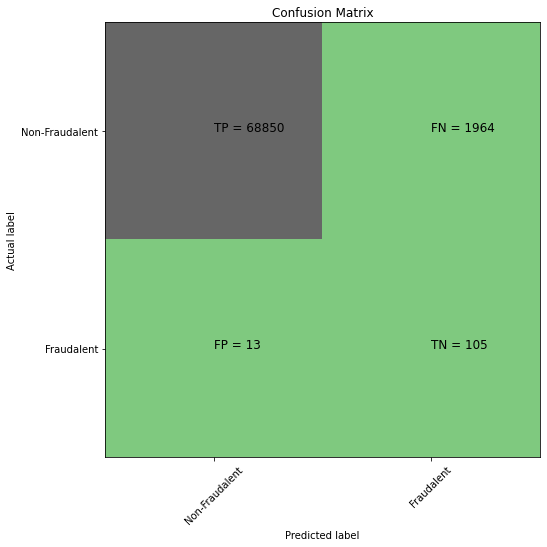

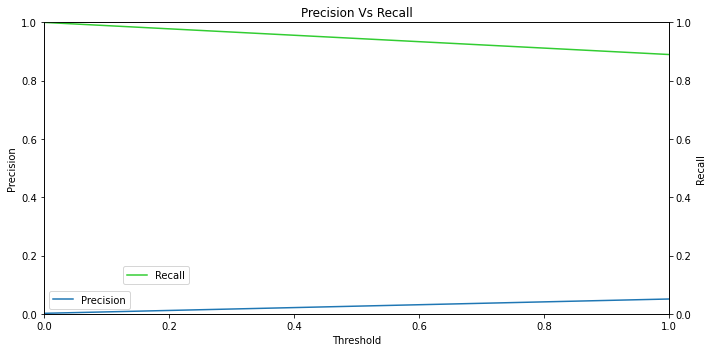

------------------------------------------------------------
Decision Tree
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.70      0.66      0.68       118

    accuracy                           1.00     70932
   macro avg       0.85      0.83      0.84     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


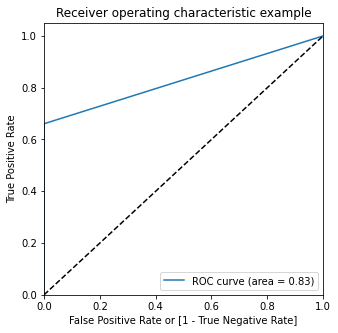

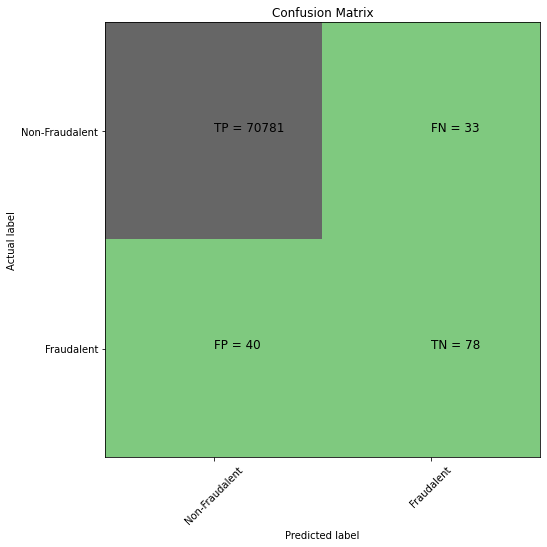

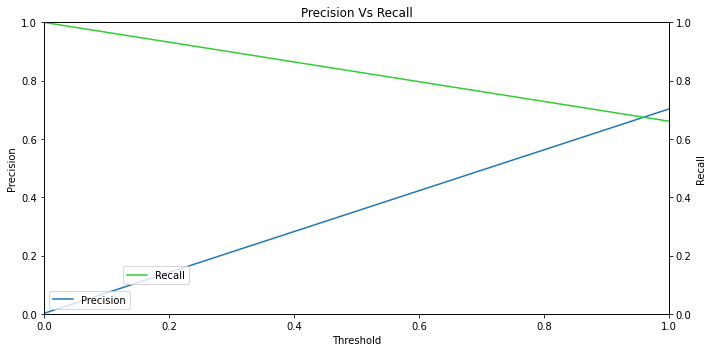

------------------------------------------------------------
Random Forest
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.94      0.74      0.82       118

    accuracy                           1.00     70932
   macro avg       0.97      0.87      0.91     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


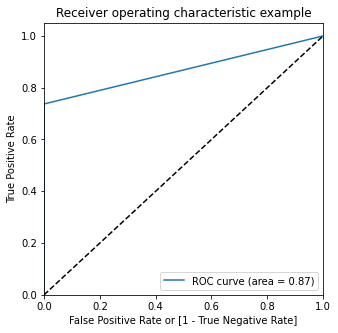

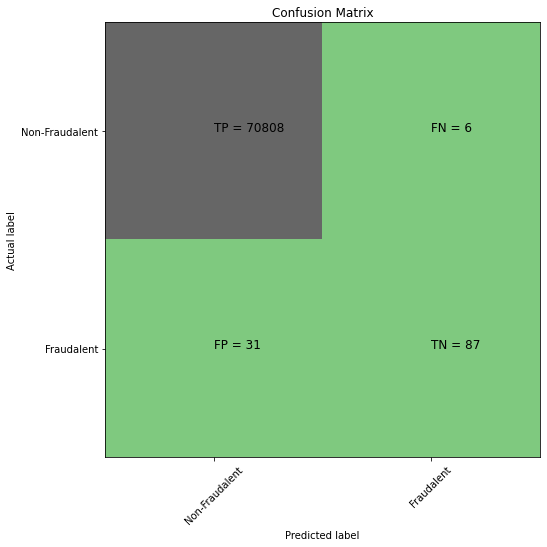

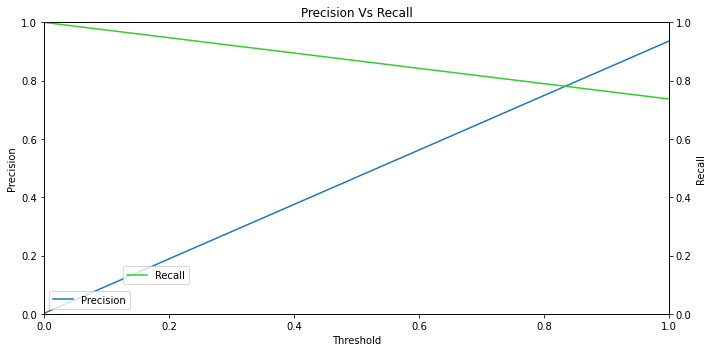

------------------------------------------------------------
XG Boost
Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70814
           1       0.21      0.86      0.34       118

    accuracy                           0.99     70932
   macro avg       0.60      0.93      0.67     70932
weighted avg       1.00      0.99      1.00     70932

ROC curve


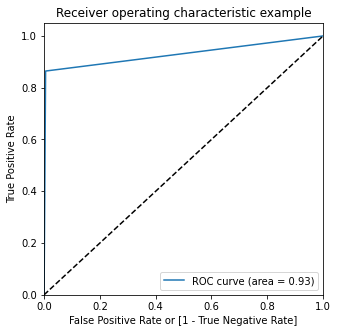

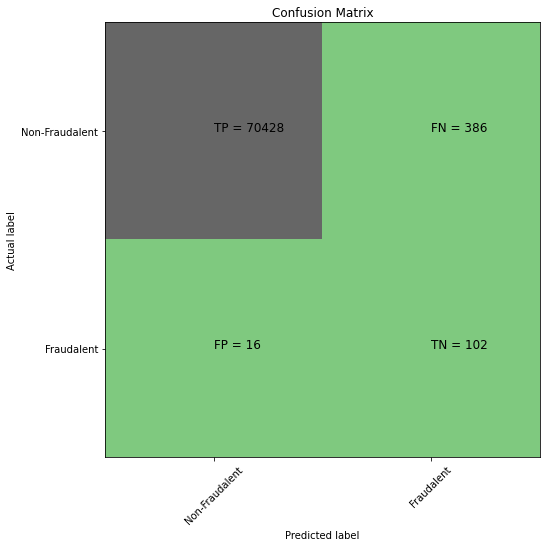

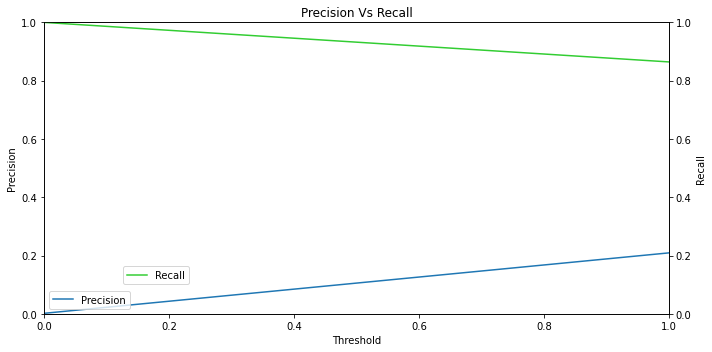

------------------------------------------------------------
MLP Classifier
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.73      0.75      0.74       118

    accuracy                           1.00     70932
   macro avg       0.86      0.88      0.87     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


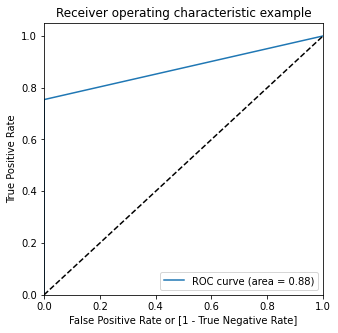

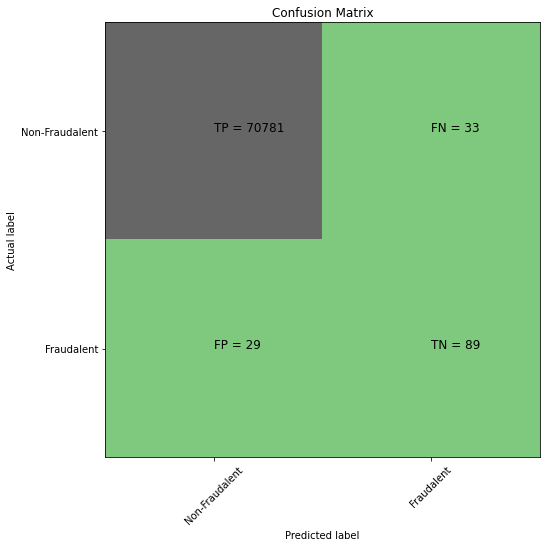

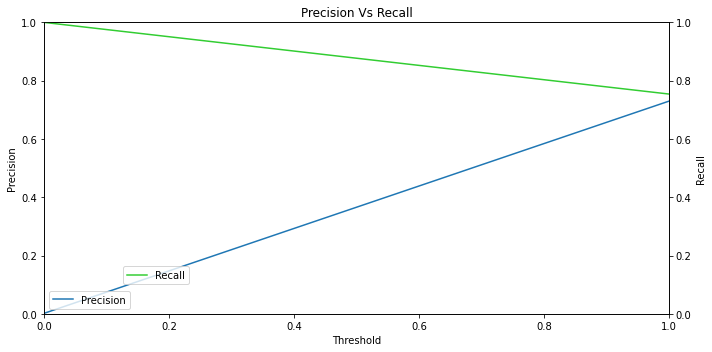

------------------------------------------------------------


In [ ]:
df_Results = model(classifiers,df_Results,"Before tuning balanced Oversampling Supervised", X_train_ros,y_train_ros, X_test, y_test)

##### <a name="p3-1-4">Oversampling with SMOTE</a>

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

SMOTE or Synthetic Minority Oversampling Technique is an oversampling technique but SMOTE working differently than typical oversampling.

* In a classic oversampling technique, the minority data is duplicated from the minority data population. While it increases the number of data, it does not give any new information or variation to the machine learning model.

* SMOTE works by utilizing a k-nearest neighbour algorithm to create synthetic data. SMOTE first start by choosing random data from the minority class, then k-nearest neighbours from the data are set. Synthetic data would then be made between the random data and the randomly selected k-nearest neighbour.

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (212794, 30)
After SMOTE oversampling X_train shape= (424878, 30)


Naive Bayes
Classification report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     70814
           1       0.05      0.82      0.09       118

    accuracy                           0.97     70932
   macro avg       0.52      0.90      0.54     70932
weighted avg       1.00      0.97      0.99     70932

ROC curve


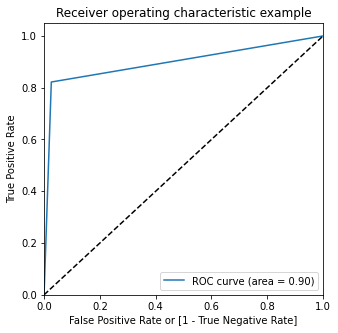

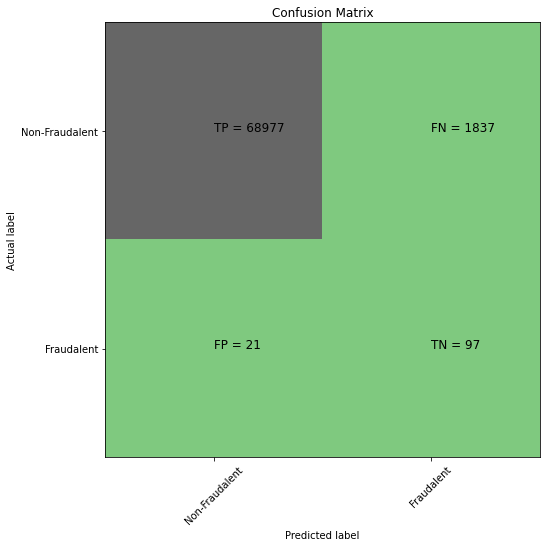

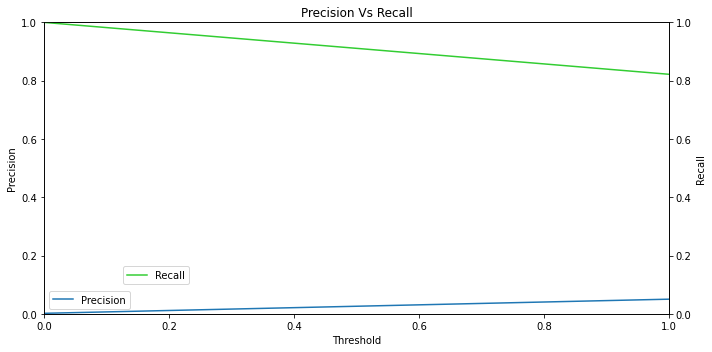

------------------------------------------------------------
Logistic Regression
Classification report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     70814
           1       0.05      0.89      0.09       118

    accuracy                           0.97     70932
   macro avg       0.52      0.93      0.54     70932
weighted avg       1.00      0.97      0.98     70932

ROC curve


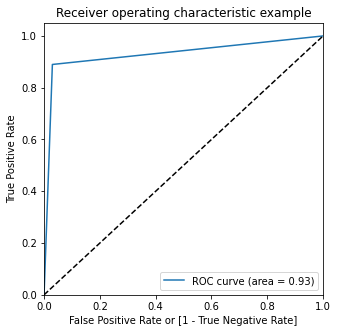

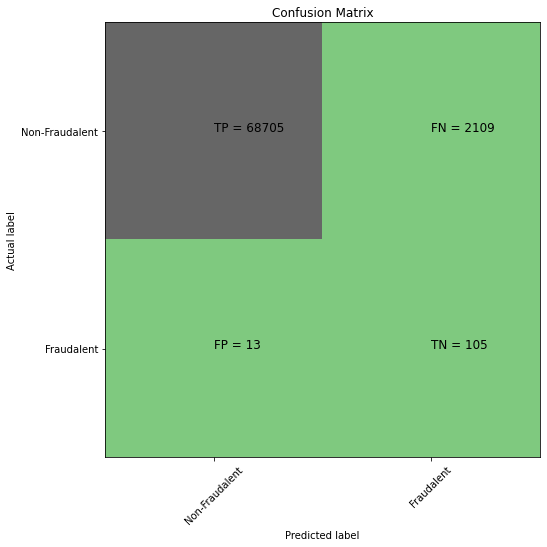

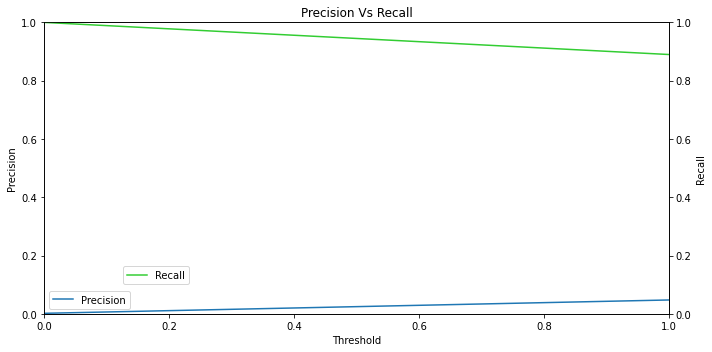

------------------------------------------------------------
Decision Tree
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.40      0.75      0.52       118

    accuracy                           1.00     70932
   macro avg       0.70      0.87      0.76     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


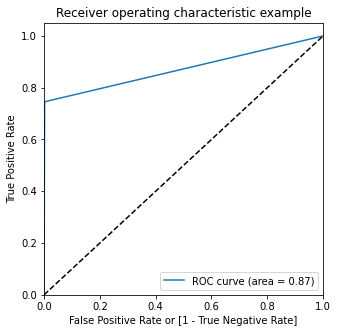

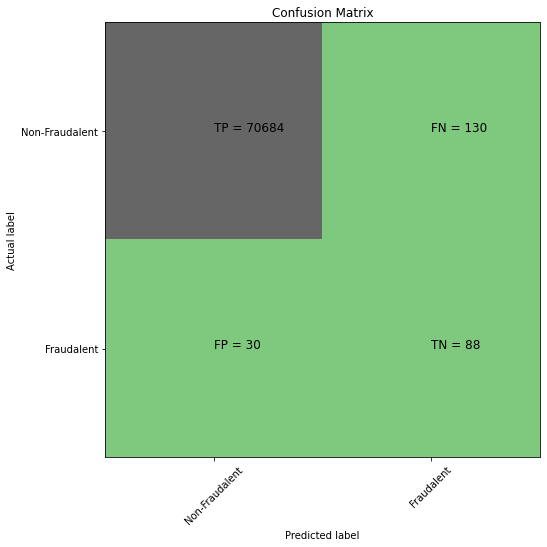

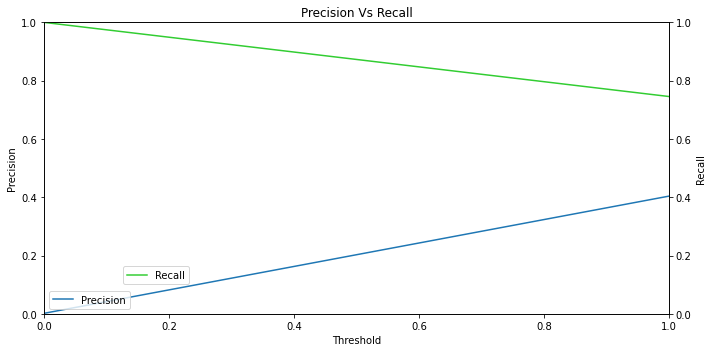

------------------------------------------------------------
Random Forest
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.89      0.75      0.82       118

    accuracy                           1.00     70932
   macro avg       0.94      0.88      0.91     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


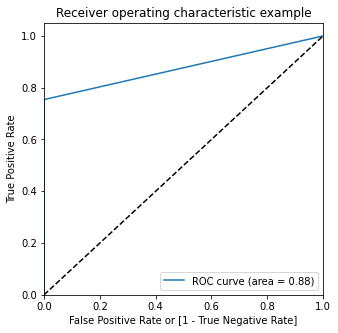

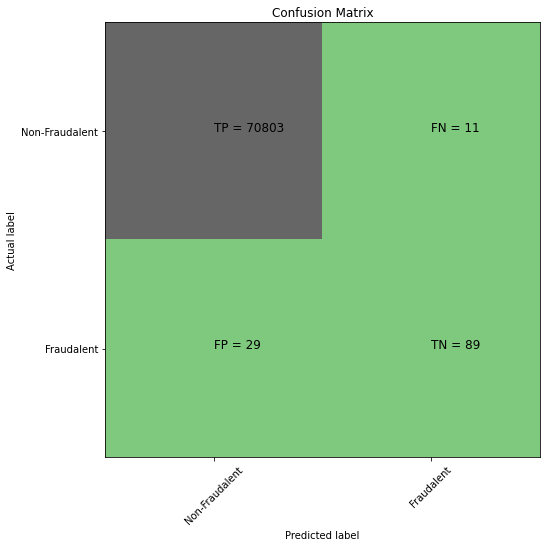

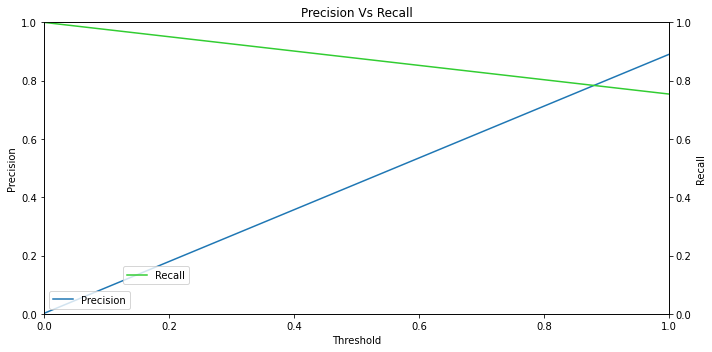

------------------------------------------------------------
XG Boost
Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70814
           1       0.12      0.87      0.20       118

    accuracy                           0.99     70932
   macro avg       0.56      0.93      0.60     70932
weighted avg       1.00      0.99      0.99     70932

ROC curve


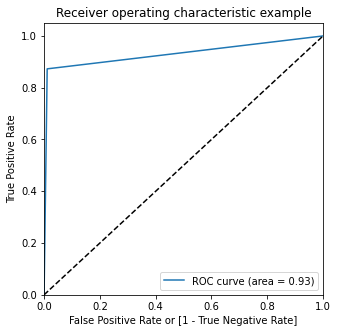

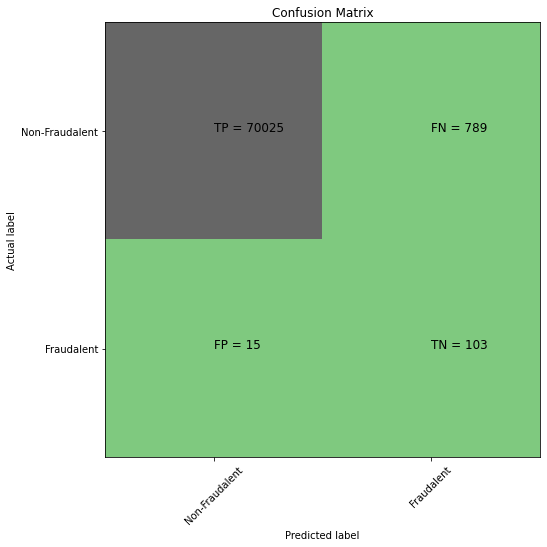

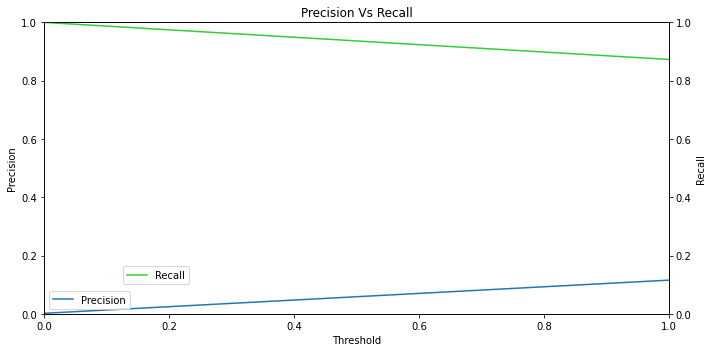

------------------------------------------------------------
MLP Classifier
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.74      0.77      0.76       118

    accuracy                           1.00     70932
   macro avg       0.87      0.89      0.88     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


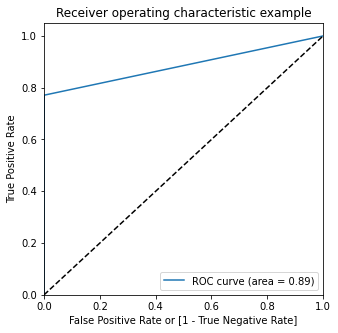

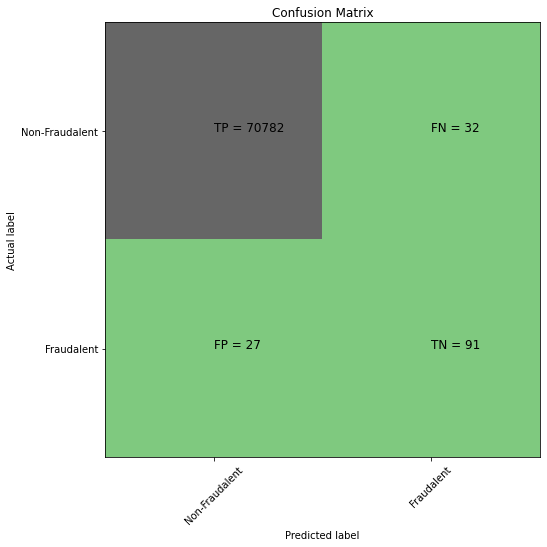

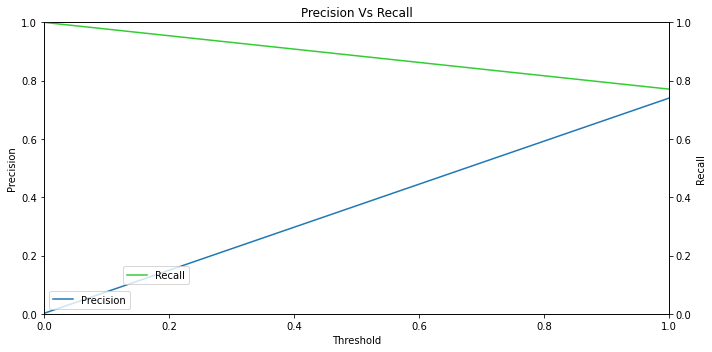

------------------------------------------------------------


In [ ]:
df_Results = model(classifiers,df_Results,"Before tuning balanced SMOTE Supervised", X_train_smote,y_train_smote, X_test, y_test)

##### <a name="p3-1-5">Oversampling with ADASYN</a>

ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples.

In [ ]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Before sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 212439, 1: 355})
New class distribution:- Counter({0: 212439, 1: 212402})


Naive Bayes
Classification report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     70814
           1       0.03      0.83      0.06       118

    accuracy                           0.96     70932
   macro avg       0.52      0.89      0.52     70932
weighted avg       1.00      0.96      0.98     70932

ROC curve


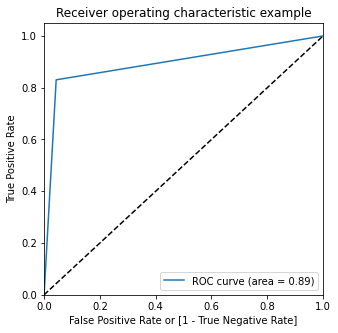

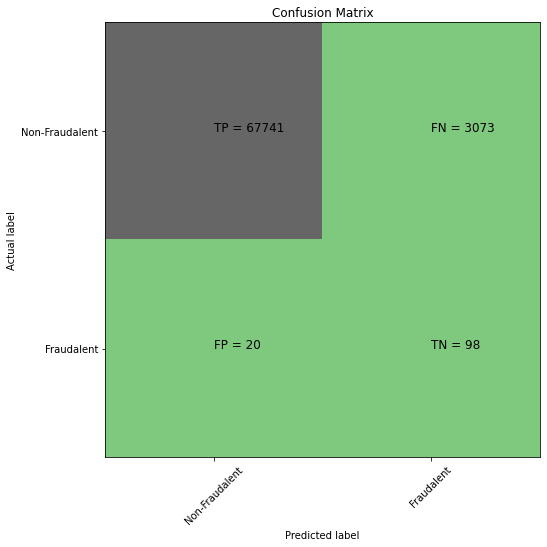

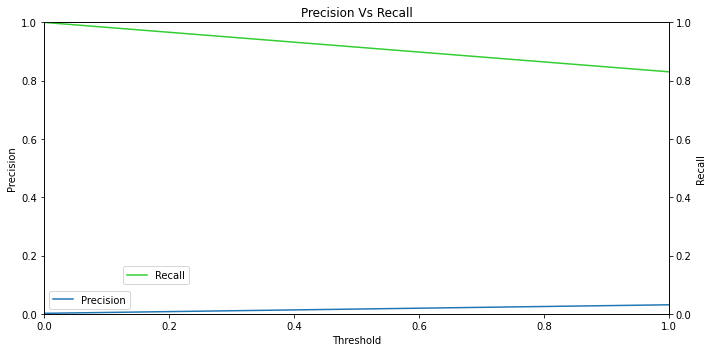

------------------------------------------------------------
Logistic Regression
Classification report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     70814
           1       0.02      0.91      0.03       118

    accuracy                           0.90     70932
   macro avg       0.51      0.90      0.49     70932
weighted avg       1.00      0.90      0.95     70932

ROC curve


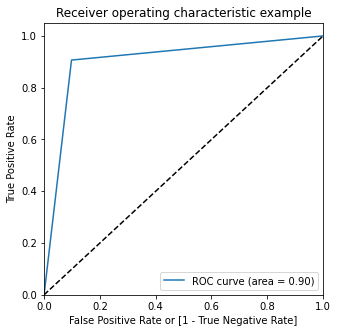

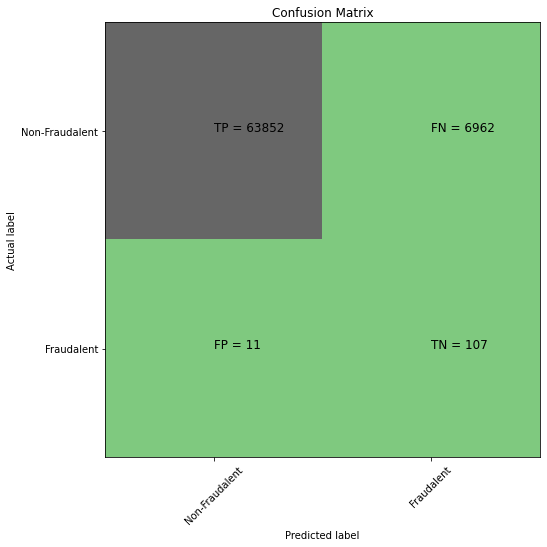

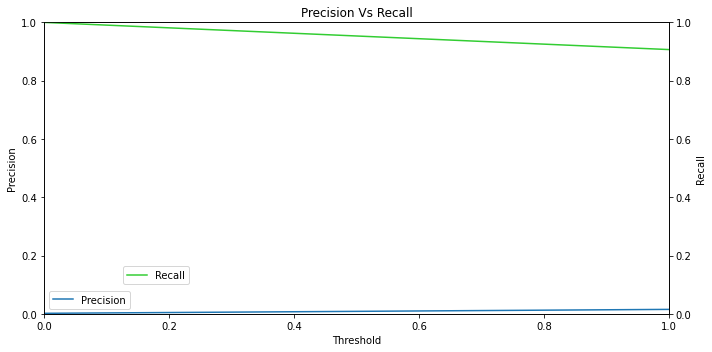

------------------------------------------------------------
Decision Tree
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.39      0.69      0.50       118

    accuracy                           1.00     70932
   macro avg       0.70      0.85      0.75     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


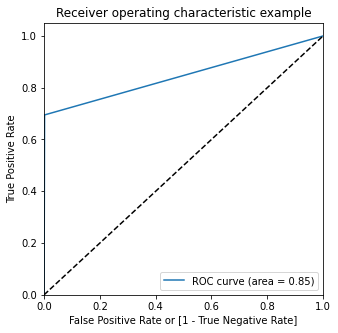

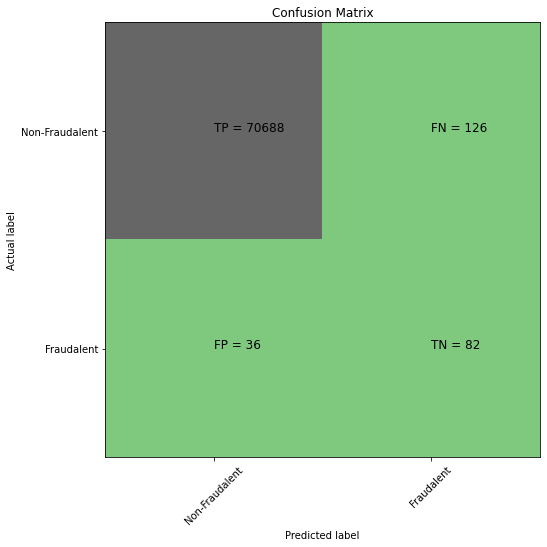

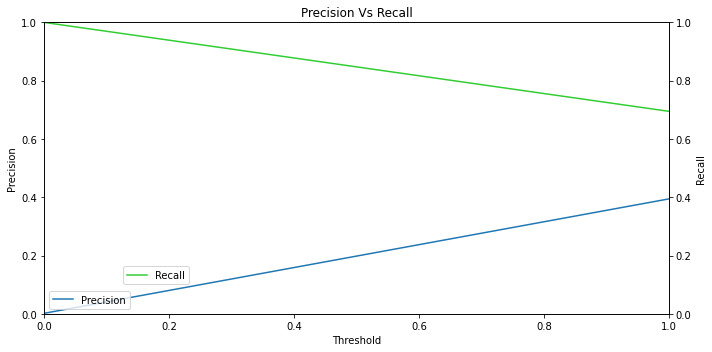

------------------------------------------------------------
Random Forest
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.88      0.75      0.81       118

    accuracy                           1.00     70932
   macro avg       0.94      0.88      0.91     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


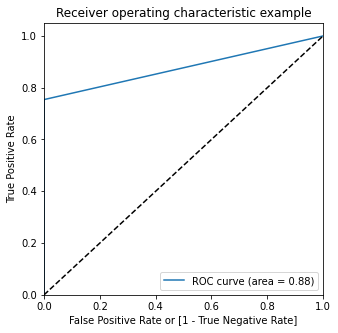

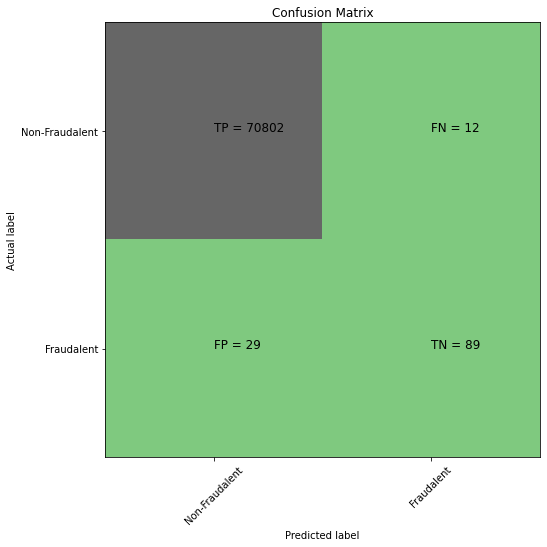

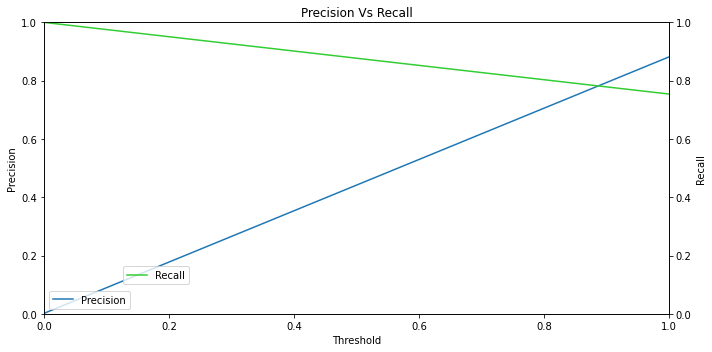

------------------------------------------------------------
XG Boost
Classification report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     70814
           1       0.04      0.87      0.08       118

    accuracy                           0.97     70932
   macro avg       0.52      0.92      0.53     70932
weighted avg       1.00      0.97      0.98     70932

ROC curve


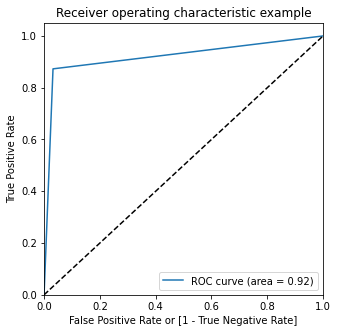

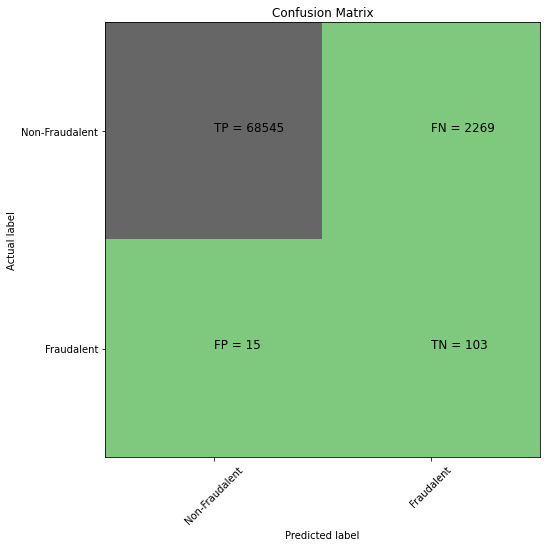

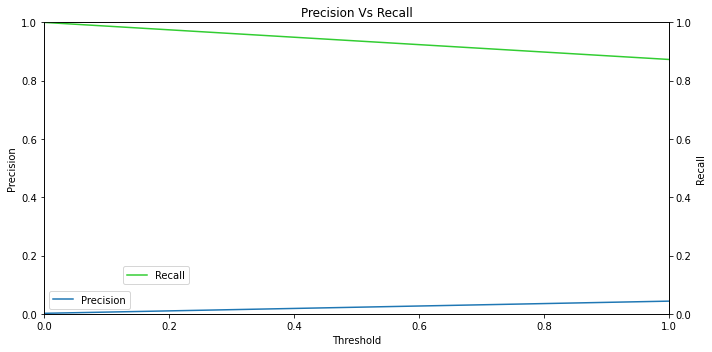

------------------------------------------------------------
MLP Classifier
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.71      0.74      0.72       118

    accuracy                           1.00     70932
   macro avg       0.86      0.87      0.86     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


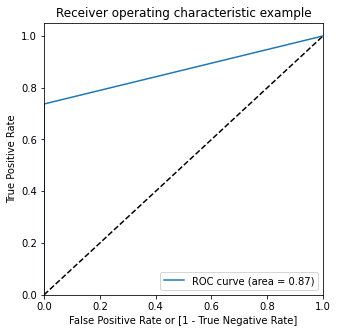

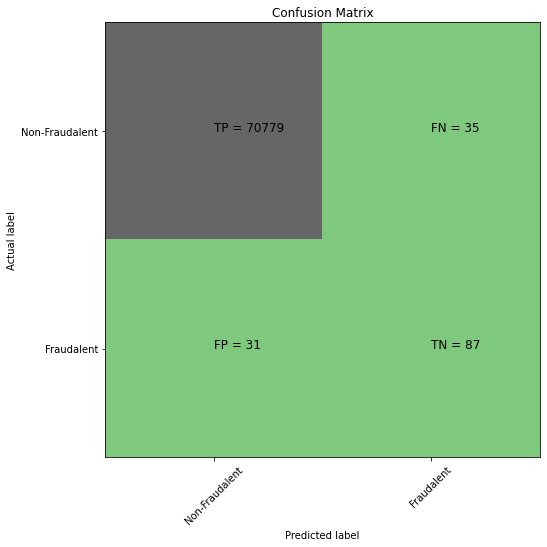

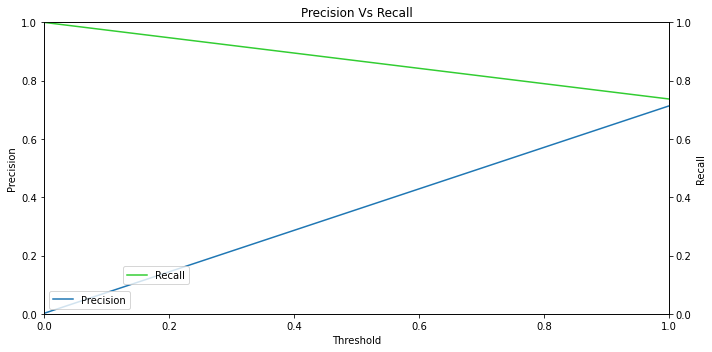

------------------------------------------------------------


In [ ]:
df_Results = model(classifiers,df_Results,"Before tuning balanced ADASYN Supervised", X_train_adasyn,y_train_adasyn, X_test, y_test)

**Why is SVM not used for building a model?**

The dataset contains 284807 datapoints and SVM is not very efficient on large datasets since it takes lot of computational power for transforming the data. If it is fine tuned or while hyperoarameters tuning it becomes computationally expensive and this is why SVM model is not built.


**Why is KNN not used for model building?**

K-nearest neighbors (KNN) is a type of supervised learning algorithm used for both regression and classification. This algorithm calculates the probability of the test data belonging to the classes of ‘K’ training data and class holding the highest probability will be selected. In the case of regression, the value is the mean of the ‘K’ selected training points.

KNN is not very memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points (for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors for that point which is computationally very expensive) or simply stating KNN struggles to build a model on large dataset.

#### <a name="p3-2">Unsupervised Algorithms</a>

**Isolation Forest**

Isolation forest is an anomaly detection algorithm. It detects anomalies using isolation rather than modelling the normal points. Tis algorithm introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. This algorithm requires small memory and has low linear time complexity. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the dataset size.

The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. Isolating the anomalies is easier because only few conditions are required to isolate them from the normal data points. But isolating normal data points require more conditions.


**Robust Covariance**

The Robust Covariance Estimator algorithm, often used for Anomaly Detection, detects outliers in datasets by assuming a normal distribution of the data. For new data points, the probability of the measured value can be determined based on the modeled probability distribution. It is based on the fact that outliers lead to an increase of the values (entries) in Σ (covariance matrix), making the spread of the data apparently larger. Consequently,the determinant of covariance matrix will also be larger, which would theoretically decrease by removing extreme events.

#### **Before balancing Unsupervised**

In [ ]:
def metric_Unsup(clf_name,y,y_pred):
  #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1
  n_errors = (y_pred != y).sum() # y contains only class variable
  # Run Classification Metrics
  print("{}: {}".format(clf_name,n_errors)) #To check number of misclassifications
  accuracy_metric = metrics.accuracy_score(y, y_pred) #To check accuracy
  f1score_metric = f1_score(y, y_pred, average = 'micro') # Calculate metrics globally by counting the total true positives, false negatives and false positives.
  confusion = metrics.confusion_matrix(y, y_pred)
  TP = confusion[0,0] # true positive
  TN = confusion[1,1] # true negatives
  FP = confusion[1,0] # false positives
  FN = confusion[0,1] # false negatives
  sensitivity = TP / float(TP+FN) #Measure of how well a machine learning model can detect positive instances.
  specificity =  TN / float(TN+FP) # Metric that evaluates a model's ability to predict true negatives of each available category.
  print("Classification Report :")
  print(classification_report(y,y_pred))
  Plot_confusion_matrix(y,y_pred)
  roc_metric = metrics.roc_auc_score(y, y_pred)
  draw_roc(y,y_pred)
  fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
  precision_recall_plot(y, y_pred,clf_name)
  threshold = thresholds[np.argmax(tpr-fpr)]
  return (accuracy_metric, f1score_metric,sensitivity,specificity,roc_metric,threshold)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.svm import OneClassSVM

In [ ]:
classifiers_unsup = {
    "Isolation Forest":IsolationForest(),
    "Elliptic Envelope": EllipticEnvelope()
    #"One Class SVM": OneClassSVM(),
    #"Local Outlier Factor": LocalOutlierFactor(novelty=True)
}

In [ ]:
def model_unsup(clf, df_Results, Methodology, X_train,y_train,X_test,y_test):
  for i, (clf_name,clf) in enumerate(classifiers_unsup.items()):
      #Fit the data and tag outliers
      clf.fit(X_train)
      y_pred = clf.predict(X_test)
      s = metric_Unsup(clf_name,y_test,y_pred)
      df_Results = df_Results.append(pd.DataFrame({'Model': clf_name +" on test data" ,'Methodology':Methodology,'Accuracy': s[0] ,'F1 score':s[1],'Sensitivity':s[2],'Specificity':s[3],'ROC value': s[4],'Threshold':s[5]}, index=[0]),ignore_index= True)
  return df_Results

##### <a name="p3-2-1">On unbalanced data</a>

Isolation Forest: 2403
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     70814
           1       0.04      0.81      0.07       118

    accuracy                           0.97     70932
   macro avg       0.52      0.89      0.53     70932
weighted avg       1.00      0.97      0.98     70932



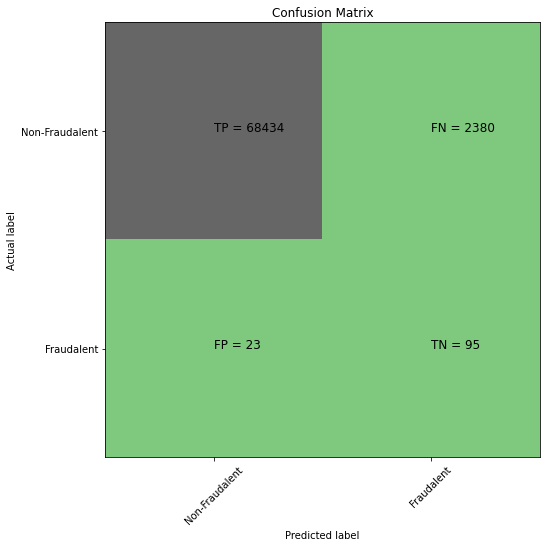

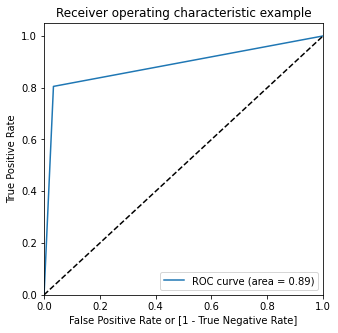

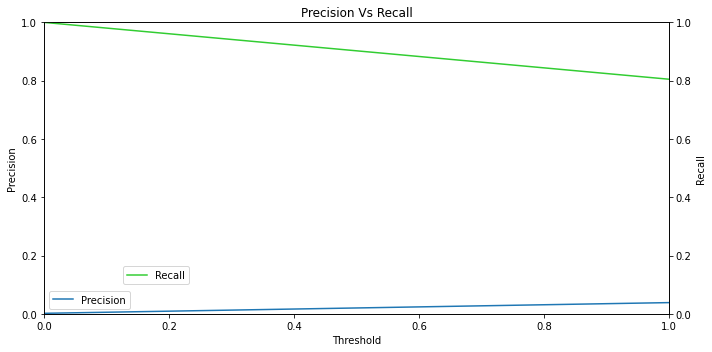

Elliptic Envelope: 7059
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     70814
           1       0.01      0.86      0.03       118

    accuracy                           0.90     70932
   macro avg       0.51      0.88      0.49     70932
weighted avg       1.00      0.90      0.95     70932



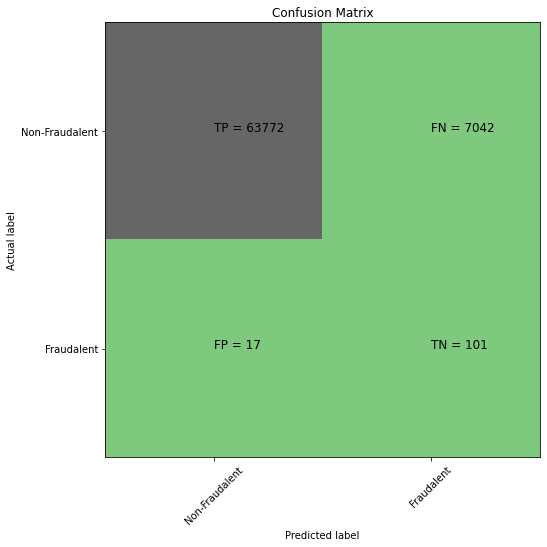

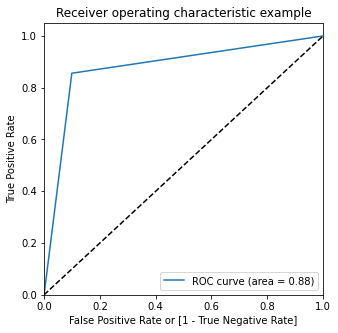

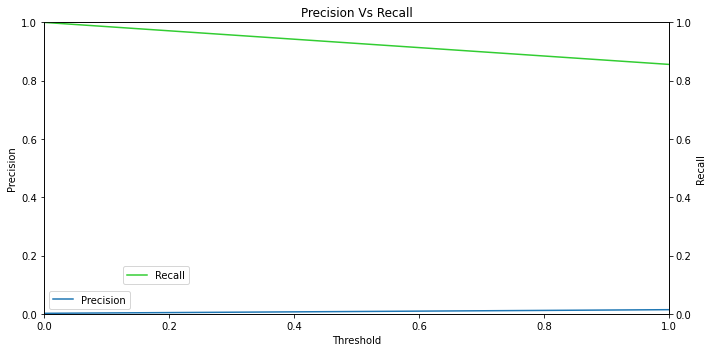

In [ ]:
df_Results = model_unsup(classifiers_unsup, df_Results,"Before tuning unbalanced Unsupervised",X_train,y_train,X_test,y_test)

##### <a name="p3-2-2">Undersampling</a>

Isolation Forest: 612
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70814
           1       0.04      0.19      0.07       118

    accuracy                           0.99     70932
   macro avg       0.52      0.59      0.53     70932
weighted avg       1.00      0.99      0.99     70932



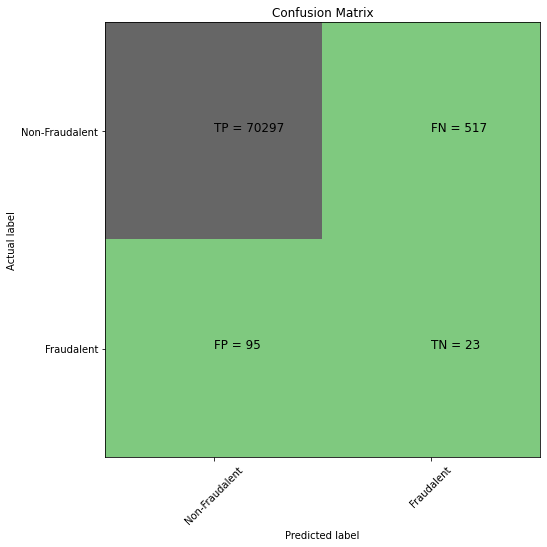

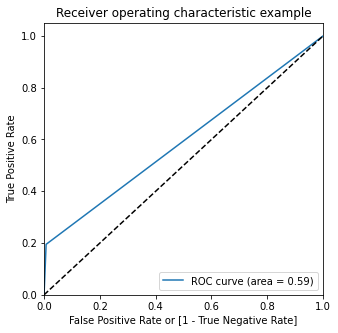

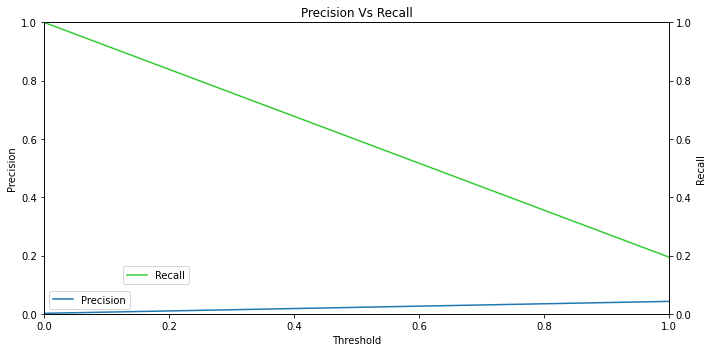

Elliptic Envelope: 2003
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     70814
           1       0.01      0.16      0.02       118

    accuracy                           0.97     70932
   macro avg       0.50      0.57      0.50     70932
weighted avg       1.00      0.97      0.98     70932



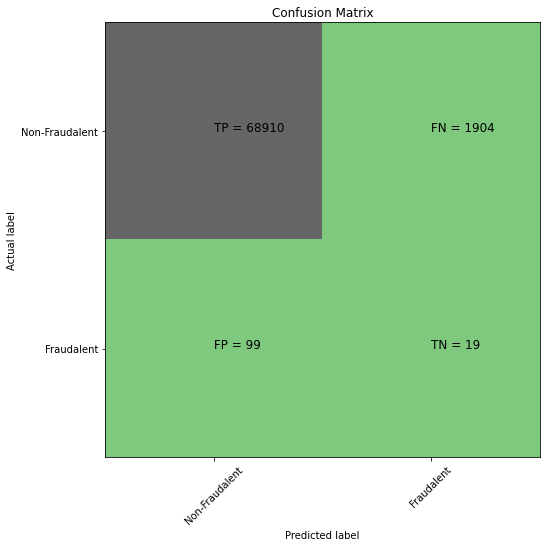

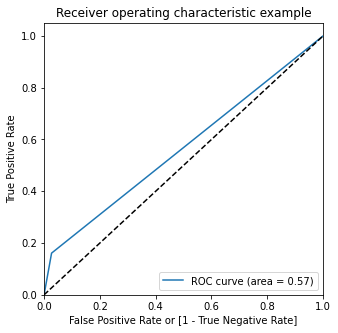

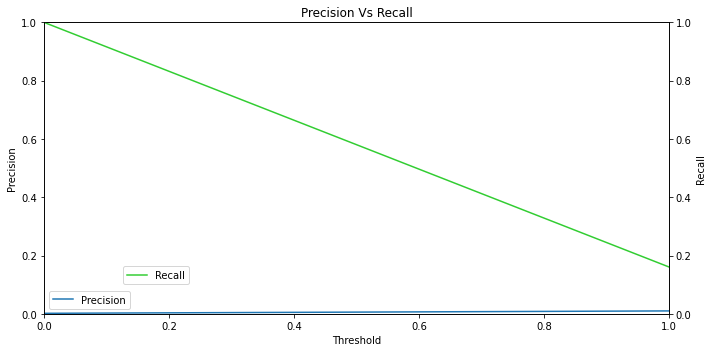

In [ ]:
df_Results = model_unsup(classifiers_unsup, df_Results,"Before tuning balanced Undersampling Unsupervised",X_train_rus,y_train_rus,X_test,y_test)

##### <a name="p3-2-3">Oversampling</a>

Isolation Forest: 914
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70814
           1       0.03      0.21      0.05       118

    accuracy                           0.99     70932
   macro avg       0.51      0.60      0.52     70932
weighted avg       1.00      0.99      0.99     70932



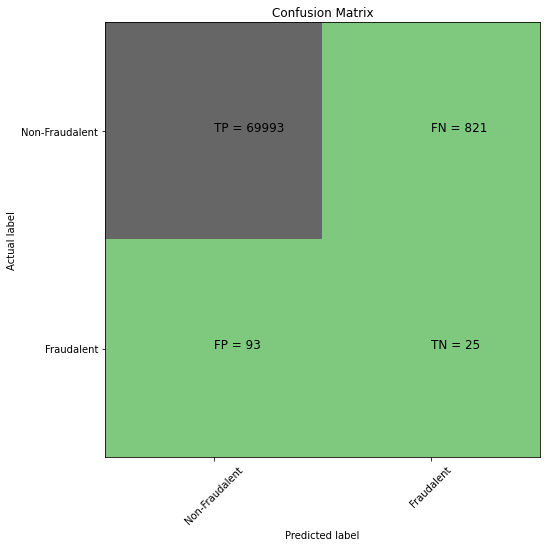

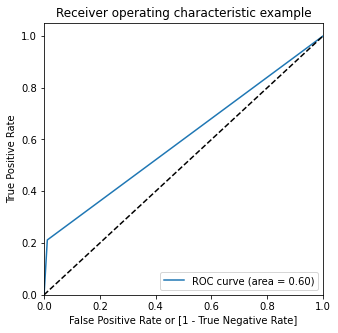

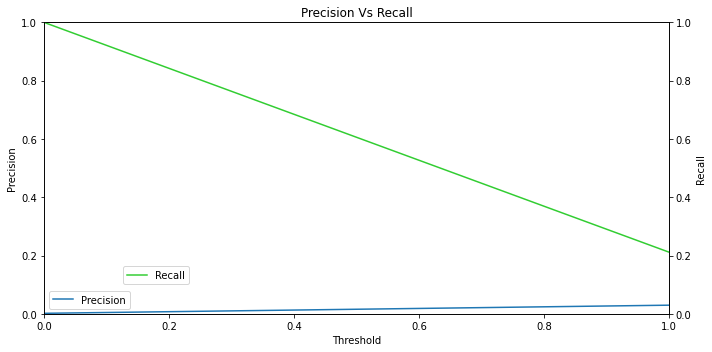

Elliptic Envelope: 1834
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70814
           1       0.01      0.15      0.02       118

    accuracy                           0.97     70932
   macro avg       0.50      0.56      0.50     70932
weighted avg       1.00      0.97      0.99     70932



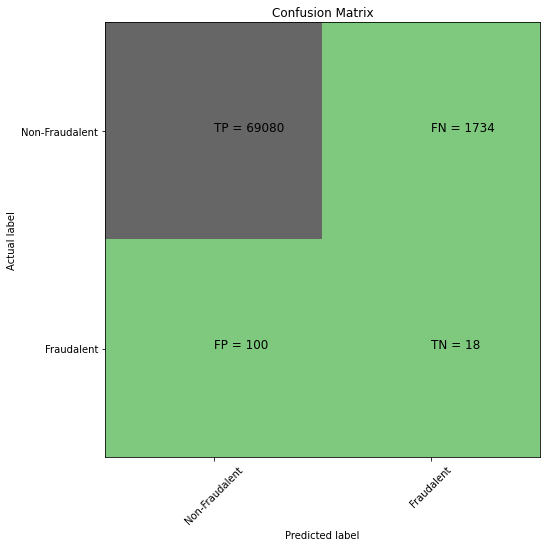

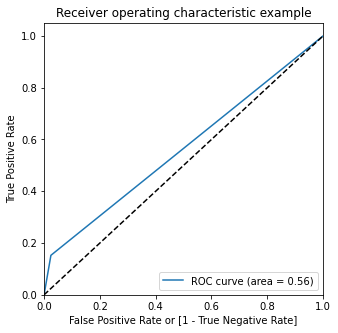

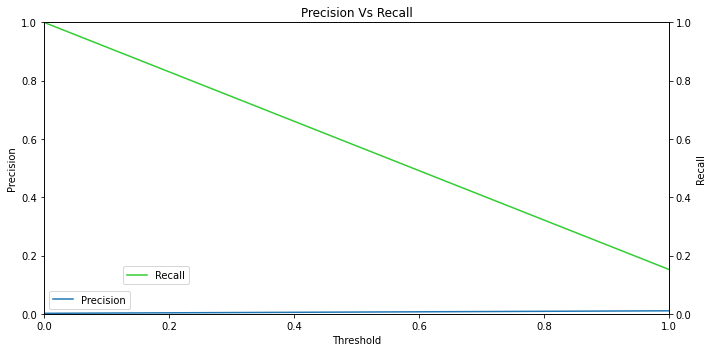

In [ ]:
df_Results = model_unsup(classifiers_unsup, df_Results,"Before tuning balanced Oversampling Unsupervised",X_train_ros,y_train_ros, X_test, y_test)

##### <a name="p3-2-4">Oversampling with SMOTE</a>

Isolation Forest: 1295
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70814
           1       0.02      0.24      0.04       118

    accuracy                           0.98     70932
   macro avg       0.51      0.61      0.52     70932
weighted avg       1.00      0.98      0.99     70932



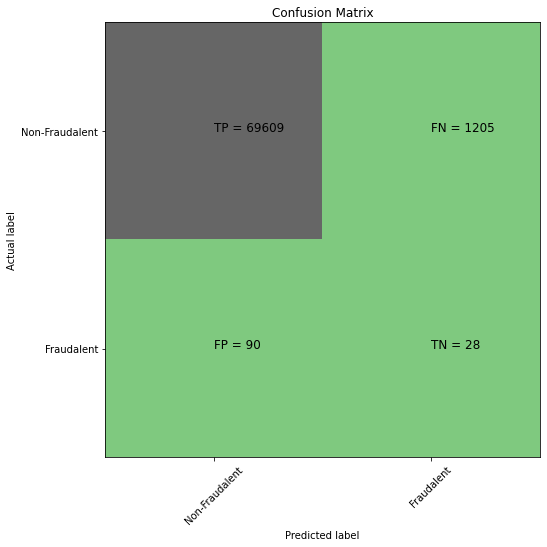

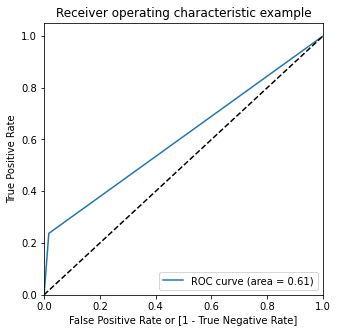

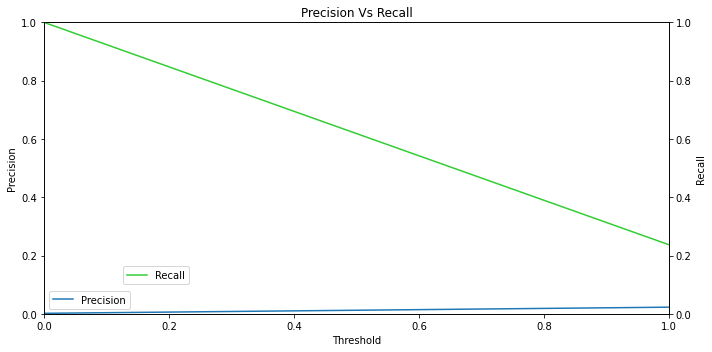

Elliptic Envelope: 2132
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     70814
           1       0.01      0.17      0.02       118

    accuracy                           0.97     70932
   macro avg       0.50      0.57      0.50     70932
weighted avg       1.00      0.97      0.98     70932



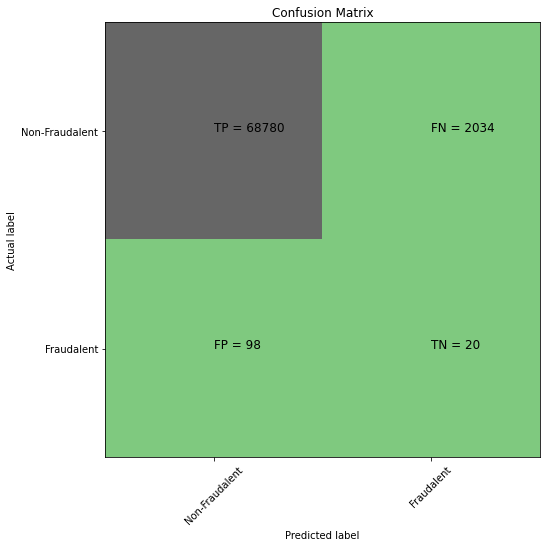

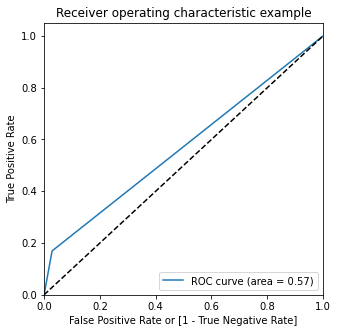

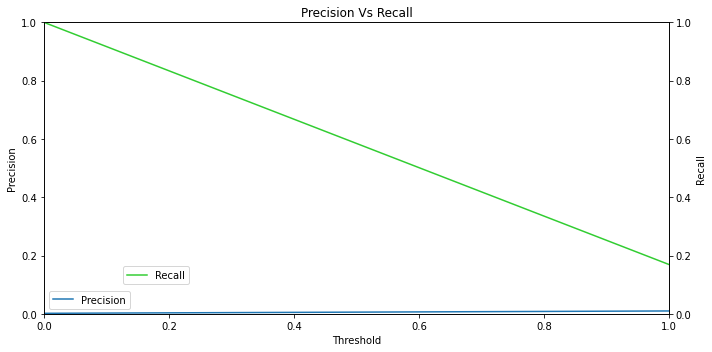

In [ ]:
df_Results = model_unsup(classifiers_unsup, df_Results,"Before tuning balanced SMOTE Unsupervised",X_train_smote,y_train_smote, X_test, y_test)

##### <a name="p3-2-5">Oversampling with ADASYN</a>

In [ ]:
df_Results = model_unsup(classifiers_unsup, df_Results,"Before tuning balanced ADASYN Unsupervised",X_train_adasyn,y_train_adasyn, X_test, y_test)

**Why is One Class Support Vector Machine not used?**

One-class SVM is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

SVM training time scales badly with number of samples, typically O(n^2) or worse. So it is not suitable for large datasets and also they perform poorly in imbalanced datasets.

**Why is Local Outlier Factor not used**?


The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The disadvantages are:

* In higher dimensions, the LOF algorithm detection accuracy gets effected.
* As LOF score can be any number that the ratio produces, it might be a little inconvenient to understand the distinguishing of inliers and outliers based on it.
* It takes more time to train the data.

In [ ]:
df_Results

Methodology  \
0                 Before tuning unbalanced Supervised   
1                 Before tuning unbalanced Supervised   
2                 Before tuning unbalanced Supervised   
3                 Before tuning unbalanced Supervised   
4                 Before tuning unbalanced Supervised   
5                 Before tuning unbalanced Supervised   
6     Before tuning balanced Undersampling Supervised   
7     Before tuning balanced Undersampling Supervised   
8     Before tuning balanced Undersampling Supervised   
9     Before tuning balanced Undersampling Supervised   
10    Before tuning balanced Undersampling Supervised   
11    Before tuning balanced Undersampling Supervised   
12     Before tuning balanced Oversampling Supervised   
13     Before tuning balanced Oversampling Supervised   
14     Before tuning balanced Oversampling Supervised   
15     Before tuning balanced Oversampling Supervised   
16     Before tuning balanced Oversampling Supervised   
17     Before tuning balanced Oversampling Supervised   
18            Before tuning balanced SMOTE Supervised   
19            Before tuning balanced SMOTE Supervised   
20            Before tuning balanced SMOTE Supervised   
21            Before tuning balanced SMOTE Supervised   
22            Before tuning balanced SMOTE Supervised   
23            Before tuning balanced SMOTE Supervised   
24           Before tuning balanced ADASYN Supervised   
25           Before tuning balanced ADASYN Supervised   
26           Before tuning balanced ADASYN Supervised   
27           Before tuning balanced ADASYN Supervised   
28           Before tuning balanced ADASYN Supervised   
29           Before tuning balanced ADASYN Supervised   
30              Before tuning unbalanced Unsupervised   
31              Before tuning unbalanced Unsupervised   
32  Before tuning balanced Undersampling Unsupervised   
33  Before tuning balanced Undersampling Unsupervised   
34   Before tuning balanced Oversampling Unsupervised   
35   Before tuning balanced Oversampling Unsupervised   
36          Before tuning balanced SMOTE Unsupervised   
37          Before tuning balanced SMOTE Unsupervised   

                               Model  Accuracy  F1 score  Sensitivity  \
0           Naive Bayes on test data  0.977739  0.109419     0.977999   
1   Logistic Regression on test data  0.999154  0.705882     0.999802   
2         Decision Tree on test data  0.999182  0.741071     0.999675   
3         Random Forest on test data  0.999535  0.845070     0.999929   
4              XG Boost on test data  0.999422  0.809302     0.999859   
5        MLP Classifier on test data  0.999478  0.829493     0.999873   
6           Naive Bayes on test data  0.889831  0.881818     0.957627   
7   Logistic Regression on test data  0.927966  0.925764     0.957627   
8         Decision Tree on test data  0.906780  0.903509     0.940678   
9         Random Forest on test data  0.932203  0.928571     0.983051   
10             XG Boost on test data  0.927966  0.925110     0.966102   
11       MLP Classifier on test data  0.927966  0.925764     0.957627   
12          Naive Bayes on test data  0.973157  0.092469     0.973409   
13  Logistic Regression on test data  0.972128  0.096022     0.972265   
14        Decision Tree on test data  0.998971  0.681223     0.999534   
15        Random Forest on test data  0.999478  0.824645     0.999915   
16             XG Boost on test data  0.994333  0.336634     0.994549   
17       MLP Classifier on test data  0.999126  0.741667     0.999534   
18          Naive Bayes on test data  0.973806  0.094542     0.974059   
19  Logistic Regression on test data  0.970084  0.090051     0.970218   
20        Decision Tree on test data  0.997744  0.523810     0.998164   
21        Random Forest on test data  0.999436  0.816514     0.999845   
22             XG Boost on test data  0.988665  0.203960     0.988858   
23       MLP Classifier on test data  0.999168  0.755187     0.999

**Model finalization**

From the above, it is clear that supervised learning algorithms worked better than unsupervised learning algorithms for this problem (since ROC value for all the unsupervised learning algorithms is really low when compared to Random Forest in supervised learning). It can be seen that accuracy is really good on test data for all the models. Hence, accuracy is not a great metric to rely on to finalize a model for this dataset. It is good to consider F1 score and ROC value as the main metric as they are varying. ROC value for all the supervised learning algorithms is really good and F1 score is good for Random Forest in all the cases (in both balanced and unbalanced).

Random forest is a good option because it produces good predictions that can be understood easily, can handle large datasets efficiently, it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy (Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data. If there are more trees, it won't allow over-fitting trees in the model).

# **Task 3** - Model fine tuning

### <a name="p4">Hyperparameter Tuning</a>
Hyperparameter tuing helps:
1. To find optimal solution space (global vs local minima).
2. Find right capacity for your solution (overfit vs underfit).
3. Speed of convergence (Path to convergence).
4. Generalize model for production.


#### **Types of tuning methods**

**Grid Search**: Search a set of manually predefined hyperparameters for the best performing hyperparameter. Use that value. (This is the traditional method)

**Random Search**: Similar to grid search, but replaces the exhaustive search with random search. This can outperform grid search when only a small number of hyperparameters are needed to actually optimize the algorithm.

**Bayesian Optimization**: Builds a probabilistic model of the function mapping from hyperparameter values to the target evaluated on a validation set.

**Gradient-Based** Optimization: Compute gradient using hyperparameters and then optimize hyperparameters using gradient descent.

**Evolutionary Optimization** Uses evolutionary algorithms (e.g. genetic functions) to search the space of possible hyperparameters.




Fine-tuning means making small adjustments to a process to achieve the desired output or performance. Here RandomizedSearchCV is used to find optimal parameters. Random search is a non-sequential sampling (tries n number of random combinations from a given hyperparameter space). In K Fold cross validation, data is fivided into K folds out of which K-1 are used for training and 1 part is used for testing the model.

In [ ]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df_RF_Tune = pd.DataFrame(columns=['Methodology','Model','Accuracy','F1 score','Sensitivity','Specificity','ROC value','Threshold'])

In [ ]:
def TuneRF(X,y):
  param_grid = {
      'max_depth': range(5,10,5),
      'min_samples_leaf': range(50, 100, 50),
      'min_samples_split': range(50, 100, 50),
      'n_estimators': [100,200],
      'max_features': [10, 20]
  }
  # Create a based model
  rf = RandomForestClassifier()
  # Instantiate the random search model
  random_search_rf = RandomizedSearchCV(estimator = rf,
                            param_distributions = param_grid,
                            scoring= 'roc_auc',
                            cv = KFold(n_splits=2, shuffle=True, random_state=4),
                            n_jobs = -1,
                            verbose = 1,
                            return_train_score=True)

  # Fit the model
  random_search_rf.fit(X, y)
  best_estimator = random_search_rf.best_estimator_
  return best_estimator

In [ ]:
def model_RF_Tune(clf, df_RF_Tune,Model, Methodology, X_train,y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  print(Model)
  y_test_pred = clf.predict(X_test)   # Predictions on the test set
  s = metric_All(Model,y_test,y_test_pred)
  df_RF_Tune = df_RF_Tune.append(pd.DataFrame({'Model': Model,'Methodology':Methodology,'Accuracy': s[0] ,'F1 score':s[1],'Sensitivity':s[2],'Specificity':s[3],'ROC value': s[4],'Threshold':s[5]}, index=[0]),ignore_index= True)
  return df_RF_Tune

#### **Tuning on unbalanced dataset**

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Random Forest
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.82      0.71      0.76       118

    accuracy                           1.00     70932
   macro avg       0.91      0.86      0.88     70932
weighted avg       1.00      1.00      1.00     70932

ROC curve


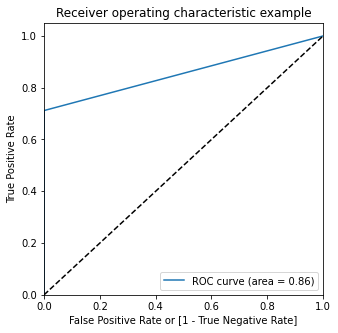

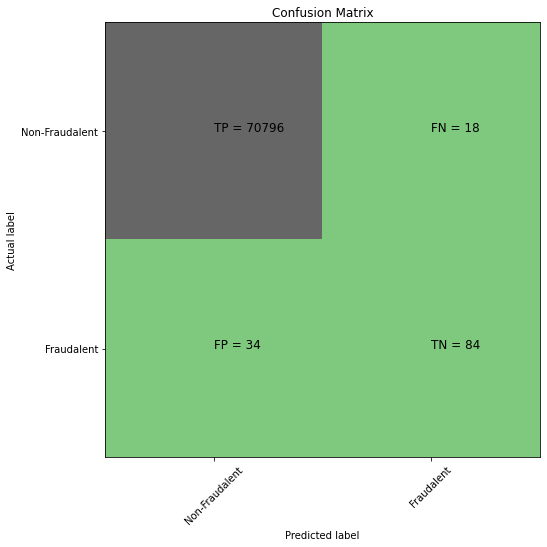

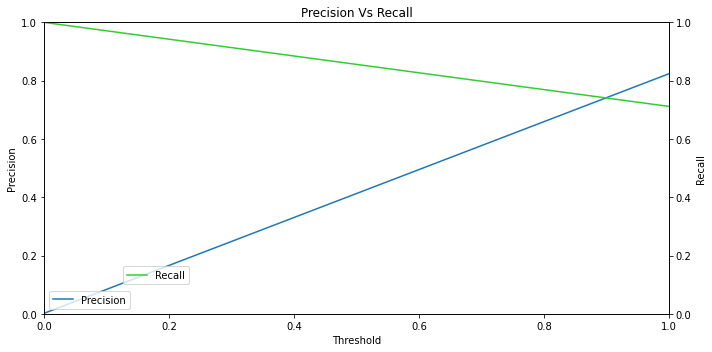

In [ ]:
df_RF_Tune = model_RF_Tune(TuneRF(X_train,y_train),df_RF_Tune,"Random Forest","After tuning Unbalanced",  X_train,y_train, X_test, y_test)

#### **Tuning on balanced dataset using undersampling, oversampling, SMOTE, ADASYN**

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Random Forest
Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70814
           1       0.09      0.86      0.17       118

    accuracy                           0.99     70932
   macro avg       0.55      0.93      0.58     70932
weighted avg       1.00      0.99      0.99     70932

ROC curve


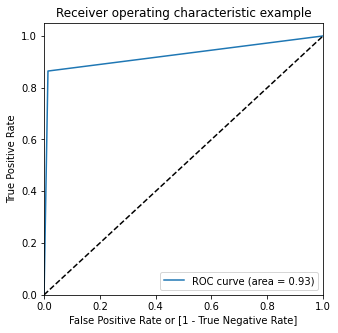

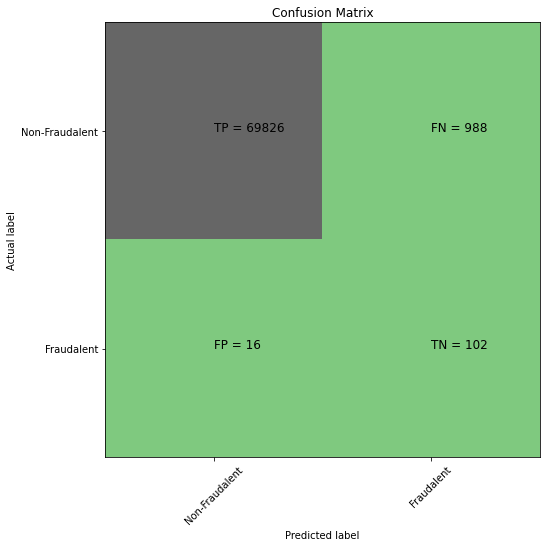

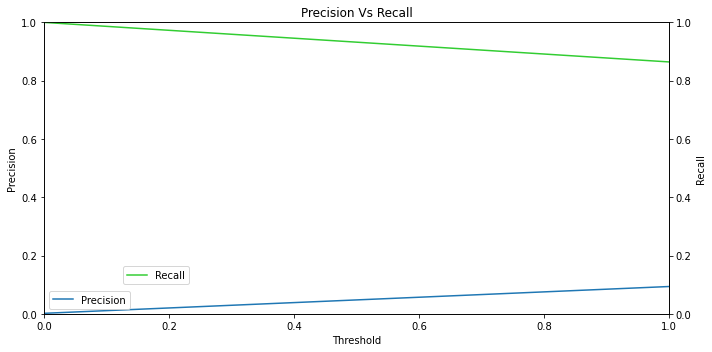

In [ ]:
df_RF_Tune = model_RF_Tune(TuneRF(X_train_rus,y_train_rus),df_RF_Tune,"Random Forest","After tuning Undersampling",  X_train_rus,y_train_rus, X_test, y_test)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Random Forest
Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70814
           1       0.15      0.83      0.26       118

    accuracy                           0.99     70932
   macro avg       0.58      0.91      0.63     70932
weighted avg       1.00      0.99      0.99     70932

ROC curve


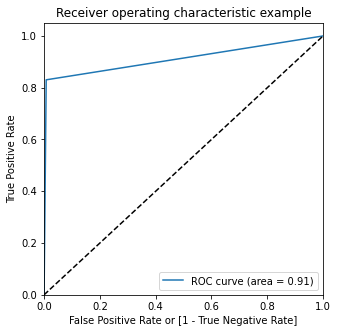

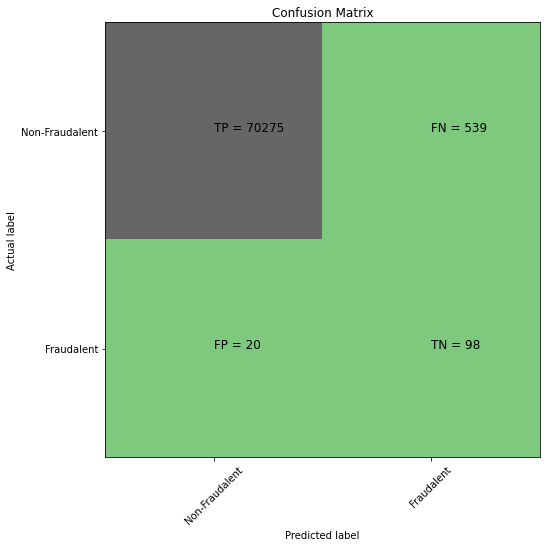

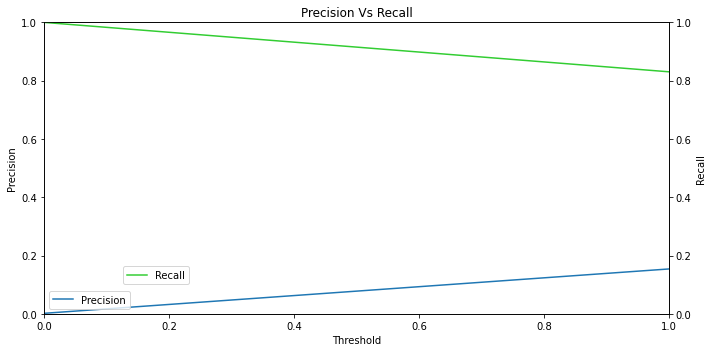

In [ ]:
df_RF_Tune = model_RF_Tune(TuneRF(X_train_ros,y_train_ros),df_RF_Tune,"Random Forest","After tuning Oversampling",  X_train_ros,y_train_ros, X_test, y_test)

#### **It took around 27 minutes to run the above code cell. So, it might take more time to tune and train on SMOTE, ADASYN data. Keeping the computational power in mind, they can be skipped. But to run it, the code cells below can be run (after uncommenting the code cells, we ran them to check the results).**

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Random Forest
Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70814
           1       0.14      0.83      0.24       118

    accuracy                           0.99     70932
   macro avg       0.57      0.91      0.62     70932
weighted avg       1.00      0.99      0.99     70932

ROC curve


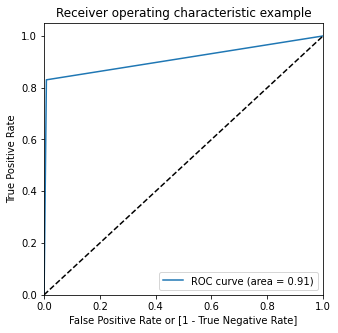

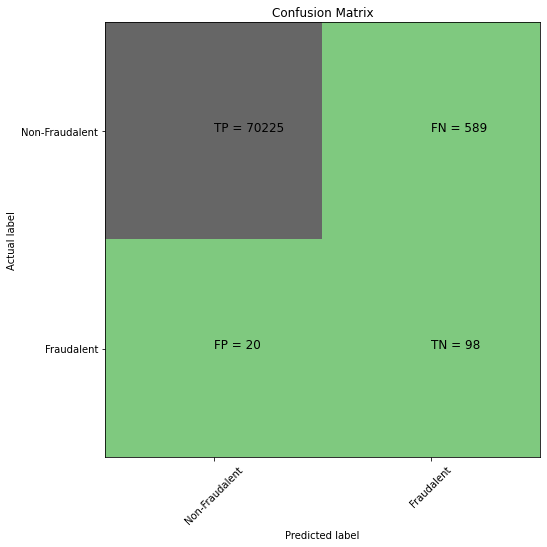

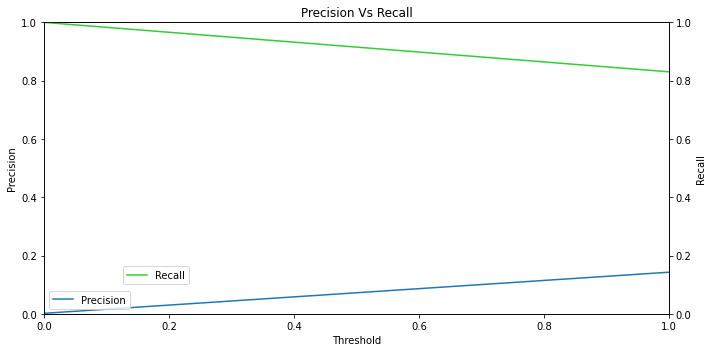

In [ ]:
# df_RF_Tune = model_RF_Tune(TuneRF(X_train_smote, y_train_smote),df_RF_Tune,"Random Forest","After tuning Oversampling SMOTE",  X_train_ros,y_train_ros, X_test, y_test)

The above code cell took more than 45 minutes to print the results (to tune and train).

In [ ]:
# df_RF_Tune = model_RF_Tune(TuneRF(X_train_adasyn,y_train_adasyn),df_RF_Tune,"Random Forest","After tuning Oversampling ADASYN",  X_train_ros,y_train_ros, X_test, y_test)

In [ ]:
df_RF_Tune

Methodology          Model  Accuracy  F1 score  \
0          After tuning Unbalanced  Random Forest  0.999267  0.763636   
1       After tuning Undersampling  Random Forest  0.985846  0.168874   
2        After tuning Oversampling  Random Forest  0.992119  0.259603   
3  After tuning Oversampling SMOTE  Random Forest  0.991414  0.243478   

   Sensitivity  Specificity  ROC value Threshold  
0     0.999746     0.711864   0.855805         1  
1     0.986048     0.864407   0.925227         1  
2     0.992389     0.830508   0.911448         1  
3     0.991682     0.830508   0.911095         1

# **Task 4** - Model results and interpretation

### <a name="p5">Conclusion</a>

In [ ]:
df_Results

Methodology  \
0                 Before tuning unbalanced Supervised   
1                 Before tuning unbalanced Supervised   
2                 Before tuning unbalanced Supervised   
3                 Before tuning unbalanced Supervised   
4                 Before tuning unbalanced Supervised   
5                 Before tuning unbalanced Supervised   
6     Before tuning balanced Undersampling Supervised   
7     Before tuning balanced Undersampling Supervised   
8     Before tuning balanced Undersampling Supervised   
9     Before tuning balanced Undersampling Supervised   
10    Before tuning balanced Undersampling Supervised   
11    Before tuning balanced Undersampling Supervised   
12     Before tuning balanced Oversampling Supervised   
13     Before tuning balanced Oversampling Supervised   
14     Before tuning balanced Oversampling Supervised   
15     Before tuning balanced Oversampling Supervised   
16     Before tuning balanced Oversampling Supervised   
17     Before tuning balanced Oversampling Supervised   
18            Before tuning balanced SMOTE Supervised   
19            Before tuning balanced SMOTE Supervised   
20            Before tuning balanced SMOTE Supervised   
21            Before tuning balanced SMOTE Supervised   
22            Before tuning balanced SMOTE Supervised   
23            Before tuning balanced SMOTE Supervised   
24           Before tuning balanced ADASYN Supervised   
25           Before tuning balanced ADASYN Supervised   
26           Before tuning balanced ADASYN Supervised   
27           Before tuning balanced ADASYN Supervised   
28           Before tuning balanced ADASYN Supervised   
29           Before tuning balanced ADASYN Supervised   
30              Before tuning unbalanced Unsupervised   
31              Before tuning unbalanced Unsupervised   
32  Before tuning balanced Undersampling Unsupervised   
33  Before tuning balanced Undersampling Unsupervised   
34   Before tuning balanced Oversampling Unsupervised   
35   Before tuning balanced Oversampling Unsupervised   
36          Before tuning balanced SMOTE Unsupervised   
37          Before tuning balanced SMOTE Unsupervised   

                               Model  Accuracy  F1 score  Sensitivity  \
0           Naive Bayes on test data  0.977739  0.109419     0.977999   
1   Logistic Regression on test data  0.999154  0.705882     0.999802   
2         Decision Tree on test data  0.999182  0.741071     0.999675   
3         Random Forest on test data  0.999535  0.845070     0.999929   
4              XG Boost on test data  0.999422  0.809302     0.999859   
5        MLP Classifier on test data  0.999478  0.829493     0.999873   
6           Naive Bayes on test data  0.889831  0.881818     0.957627   
7   Logistic Regression on test data  0.927966  0.925764     0.957627   
8         Decision Tree on test data  0.906780  0.903509     0.940678   
9         Random Forest on test data  0.932203  0.928571     0.983051   
10             XG Boost on test data  0.927966  0.925110     0.966102   
11       MLP Classifier on test data  0.927966  0.925764     0.957627   
12          Naive Bayes on test data  0.973157  0.092469     0.973409   
13  Logistic Regression on test data  0.972128  0.096022     0.972265   
14        Decision Tree on test data  0.998971  0.681223     0.999534   
15        Random Forest on test data  0.999478  0.824645     0.999915   
16             XG Boost on test data  0.994333  0.336634     0.994549   
17       MLP Classifier on test data  0.999126  0.741667     0.999534   
18          Naive Bayes on test data  0.973806  0.094542     0.974059   
19  Logistic Regression on test data  0.970084  0.090051     0.970218   
20        Decision Tree on test data  0.997744  0.523810     0.998164   
21        Random Forest on test data  0.999436  0.816514     0.999845   
22             XG Boost on test data  0.988665  0.203960     0.988858   
23       MLP Classifier on test data  0.999168  0.755187     0.999

In [ ]:
df_RF_Tune

Methodology          Model  Accuracy  F1 score  \
0          After tuning Unbalanced  Random Forest  0.999267  0.763636   
1       After tuning Undersampling  Random Forest  0.985846  0.168874   
2        After tuning Oversampling  Random Forest  0.992119  0.259603   
3  After tuning Oversampling SMOTE  Random Forest  0.991414  0.243478   

   Sensitivity  Specificity  ROC value Threshold  
0     0.999746     0.711864   0.855805         1  
1     0.986048     0.864407   0.925227         1  
2     0.992389     0.830508   0.911448         1  
3     0.991682     0.830508   0.911095         1

Several models are tried till now on both balanced and imbalanced data. It is noticed that most of the models have performed more or less well in terms of ROC score, Precision and Recall.

**Advantages of random forest**

We use random forest as a good classifier for this data set. The popularity of decision tree models in data mining is owed to their simplification in algorithm and flexibility in handling different data attribute types. However, single-tree model is possibly sensitive to specific training data and easy
to overfit. Ensemble methods can solve these problems by combine a group of individual decisions in some way and are more accurate than single classifiers. Random forest, one of ensemble methods, is a combination of multiple tree predictors such that each tree depends on a random independent dataset and all trees in the forest are of the same distribution. The capacity of random forest not only depends on the strength of individual tree but also the correlation between different trees. The stronger the strength of single tree and the less the correlation of different tress, the better the performance of random forest. The variation of trees comes from their randomness which involves bootstrapped samples and randomly selects a subset of data attributes.

**Summary or interpretation**

For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

Of all the models we created we found Random Forest (without any oversampling or undersampling) gave us the best result (it can be seen that Random Forest has good ROC score and also high Recall). Hence, we can go with the random forest classifier here.